<div style="text-align: justify; max-width: 90%; margin-left: 0px; margin-right: auto;">
<div align="center">

# **_ML to Determine 4-Node Star System Electrical Grid Stability_**
## **_Kelompok 5 - Klasifikasi Biner_**
## **_(Logistic Regression dan Decision Tree)_**

</div>

###  **Anggota** :
1. Fadhli Ammar Taqiyuddin Hakim (2206817396)
2. Marvel Davin Steven Ginting Suka (2206030470)
3. Ariel Muljadi (2206032034)
4. Rafie Fahim Rayhan (2206028863)
5. Ferdinand Sumichael Sunan (2206056173)

### **Problem Klasifikasi** : 

<div align="center">

![4-node star system][gambar1]

Gambar 1. Struktur _4-Node Star System Electrical Grid_
</div>

Problem klasifikasi untuk tugas ini diambil berdasarkan [dataset][link dataset] yang diperoleh melalui _**UCI Machine Learning Repository**_ oleh **Vadim Arzamasov**. Kemudian, dataset ini juga dibuat versi _augmented_-nya oleh seseorang di [kaggle][link kaggle] dengan perbedaannya hanyalah jumlah data-nya saja, yaitu versi _vanilla_-nya memiliki 10000 data dan versi _augmented_-nya memiliki 60000 data.  

Dataset tersebut akan digunakan untuk membuat sebuah model ML yang dapat digunakan untuk menentukan kestabilan dari _Electrical Grid_ (jaringan listrik yang dapat dalam bentuk jaringan saluran listrik atau infrastruktur lain yang saling terhubung untuk proses distribusi listrik dari produsen ke konsumen). Sumber referensi lain yang dapat mendukung penggunaan problem klasifikasi dan dataset ini untuk menentukan kestabilan yaitu dapat dilihat di [_conference paper_][paper1] dan [_journal article_][paper2]. 

Kestabilan dari _Electrical Grid_ dilihat dari keseimbangan dalam produksi dan konsumsi listrik pada jaringan listrik. Listrik tidak dapat disimpan di jalur transmisi pada jaringan listrik, sehingga listrik yang diproduksi harus sama dengan listrik yang dikonsumsi (listrik masuk = listrik keluar) dalam konsep distribusi listrik. Nah, kesetimbangan tersebut memastikan operasi yang aman dan stabil pada grid dengan frekuensi yang konstan di 50Hz (tergantung standar frekuensinya). Ketika terdapat ketidakseimbangan antara _power supply_ dengan _power demand_-nya, maka dapat dikatakan bahwa terdapat ketidakstabilan pada _Electrical Grid_ yang menyebabkan terjadinya ketidakstabilan pada tegangan dan deviasi pada frekuensi-nya. 

Faktor-faktor yang menentukan kestabilan _electrical grid_ atau jaringan listrik di sini akan dijadikan fitur-fitur dalam proses pembuatan model untuk problem klasifikasi biner yang sudah dideskripsikan sebelumnya, beberapa fitur-fitur tersebut yaitu : 
* **tau(x)** (_Reaction Time_) :
  
   _Reaction time_ dari tiap komponen atau node dari suatu jaringan listrik (_electrical grid_), "x" merupakan angka yang menunjukkan pada node mana di jaringan listrik fitur ini dimiliki. 
* **p(x)** (_Total Power Consumed/Produced_) :

   Di sini p(x) merupakan banyaknya daya yang dihasilkan/dikonsumsi oleh sebuah part atau node dalam jaringan listrik. Pada dataset ini, p1 merupakan produsen listrik yang di mana daya listriknya akan terdistribusi ke p2, p3, dan p4. Maka dari itu p1 merupakan sebuah fungsi terhadap p2, p3, dan p4. Karena p1 merupakan fungsi dari p2, p3, dan p4, maka p1 menjadi fitur atau atribut yang non-prediktif, sehingga data-nya tidak akan kami gunakan dalam proses training model dan untuk testing. Maka dari itu bisa dikatakan data yang kami gunakan adalah banyaknya daya yang dikonsumsi oleh tiap node, tanpa perlu memasukkan input yang berupa fitur terkait banyaknya daya yang dihasilkan. Karena di sini hanya ada 1 produsen, yaitu p1, di mana daya-nya akan dibagi rata ke p2, p3, dan p4.

<div align="center">

$ p_1 = |p_2 + p_3 + p_4| $
</div> 

* **g(x)** (_Elasticity Coefficient_) :
  
   Di sini g(x) merupakan koefisien elastisitas yang fungsinya pada grid adalah untuk menunjukkan bagaimana node merefleksikan elastisitas atau bagaimana responsivitas dari salah satu node terhadap perubahan harga, di mana hal ini digunakan untuk menyesuaikan konsumsi maupun produksi listrik. Semakin tinggi elastisitasnya maka _power usage_ dapat dilakukan penyesuaian dengan lebih cepat terhadap sinyal harga. 

[link dataset]: https://archive.ics.uci.edu/dataset/471/electrical+grid+stability+simulated+data 
[link kaggle]: https://www.kaggle.com/datasets/smartgrids/smart-grid-stability/data?select=smart_grid_stability_augmented.csv
[paper1]: https://ieeexplore.ieee.org/document/8587498 
[paper2]: https://link.springer.com/article/10.1140/epjst/e2015-50136-y 
[gambar1]: ./4node.png 

</div>

### **Algoritma** : 
<div style="text-align: justify; max-width: 90%; margin-left: 0px; margin-right: auto;">

Proses training model akan dilakukan dengan beberapa informasi berikut dari dataset : 
* Input (Fitur) : tau1, tau2, tau3, tau4, p2, p3, p4, g1, g2, g3, g4.  
* Output : stabf (kestabilan _Electrical Grid_-nya, apakah _stable_ "1" atau _unstable_ "0").

**Pseudocode (Menggunakan _Logistic Regression_)** : 

- **Step 1**: Preprocessing Data
  - Load dataset dan hapus kolom yang tidak dibutuhkan (`stab` dan `p1`).
  - Pisahkan input dan output; kolom input akan dinormalisasi, sedangkan kolom output tidak dinormalisasi karena sudah biner.
  - Opsional: Normalisasi input menggunakan Z-Score dengan menghitung mean dan standar deviasi dari setiap fitur dalam data training.

- **Step 2**: Pisah Data Training, Validasi, dan Testing
  - Pisahkan data menjadi data training (70%), validasi (15%), dan testing (15%).

- **Step 3**: Inisialisasi Model
  - Buat class Logistic Regression dengan parameter `weights`, `bias`, dan `learning rate`.
  - Inisialisasi `weights` secara acak menggunakan _Xavier Initialization_ dengan distribusi uniform (boleh juga kalau mau pakai yang distribusi normal), dan bias diinisialisasi menjadi 0.

- **Step 4**: Training Model
  - Tentukan jumlah epoch maksimum (`epochs`) dan nilai `patience` untuk early stopping.
  - Untuk setiap epoch:
    - Feedforward (Forward Propagation):
      - Hitung kombinasi linear: $\mathbf{z} = X \cdot \mathbf{w} + b$
      - Aplikasikan fungsi aktivasi sigmoid pada $\mathbf{z}$ untuk menghasilkan prediksi probabilitas: $\hat{y} = \sigma(\mathbf{z})$
    - Hitung Training Loss dan Validation Loss: Gunakan Binary Cross-Entropy untuk mengukur perbedaan antara prediksi dan nilai aktual dalam data training.
    - Backpropagation:
      - Hitung error antara $\hat{y}$ dan $y$ dalam data training.
      - Hitung gradien Binary Cross-Entropy terhadap `weights` dan `bias`.
      - Update `weights` dan `bias` menggunakan Gradient Descent.
    - Validasi:
      - Validation Loss yang diperoleh dari feedforward dengan data validasi digunakan untuk mendapatkan `val_loss`.
      - Jika `val_loss` lebih baik dari sebelumnya, simpan parameter `weights` dan `bias` saat ini, dan reset `patience_counter`.
      - Jika `val_loss` memburuk, tambahkan `patience_counter`. Jika `patience_counter` melebihi `patience`, lakukan early stopping.

- **Step 5**: Testing dan Evaluasi Model
  - Testing: Gunakan data testing untuk menghitung `test_loss` dengan Binary Cross-Entropy.
  - Confusion Matrix: Hitung nilai TP, TN, FP, dan FN.
  - Evaluasi Performa Model: Hitung metrik akurasi, presisi, recall, F1-score, dan true negative rate berdasarkan nilai pada Confusion Matrix.

- **Step 6**: Prediksi Baru
  - Untuk melakukan prediksi baru:
    - `predict_probability`: Berikan output berupa probabilitas dari fungsi sigmoid.
    - `predict_binary`: Gunakan threshold 0.5 untuk mengonversi probabilitas ke 0 atau 1.


Pseudocode (Menggunakan _Decision Tree_) :
- **Step 1**: Preprocessing Data
  - **Load Dataset**: membaca dataset dari file CSV.
  - **Pisahkan Input dan Output**:
    - Memisahkan data menjadi fitur (`X`) dan target (`y`).
  - **Konversi Target Biner**:
    - Mengubah kolom `stabf` menjadi nilai biner: `1` jika `stable`, `0` jika `unstable`.
  - **Split Data Training dan Testing**:
    - Membagi data menjadi data training (70%) dan data testing (30%).

- **Step 2**: Mendefinisikan Fungsi Pembantu
  - **Fungsi Gini Impurity**:
    - Menghitung impurity Gini untuk mengukur seberapa tidak murni suatu kumpulan data. Semakin rendah impurity, semakin baik pembagiannya. Gini Impurity dihitung dengan mempertimbangkan jumlah sampel di setiap kelas dan total sampel, di mana nilai mendekati 0 menunjukkan pembagian yang lebih baik.
  - **Fungsi Split Data**:
    - Membagi data berdasarkan fitur dan nilai ambang tertentu untuk mendapatkan dua subset: `left` (data yang nilainya kurang atau sama dengan ambang) dan `right` (data yang nilainya lebih dari ambang).
  - **Fungsi Information Gain**:
    - Menghitung peningkatan informasi (information gain) dari membagi dataset berdasarkan suatu fitur. Information gain dihitung dengan mengurangi impurity sebelum pembagian dengan rata-rata impurity setelah pembagian, di mana semakin tinggi nilai information gain, semakin baik pembagiannya.

- **Step 3**: Mendefinisikan Kelas Node Pohon dan Decision Tree
  - **Kelas TreeNode**:
    - Mendefinisikan atribut seperti `feature`, `threshold`, `left child`, `right child`, dan `value` untuk setiap node pohon.
  - **Kelas DecisionTree**:
    - **Inisialisasi**:
      - Menentukan kedalaman maksimum (`max_depth`) dan jumlah minimal sampel untuk pembagian (`min_samples_split`).
    - **Metode Best Split**:
      - Untuk setiap fitur, mencari nilai ambang yang memaksimalkan informasi gain. Split terbaik adalah yang memberikan informasi gain tertinggi, menunjukkan bahwa pemisahan data tersebut menghasilkan subset yang lebih "bersih".
    - **Metode Build Tree**:
      - Membangun decision tree secara rekursif. Jika kedalaman maksimum atau jumlah sampel minimum tercapai, node daun dibuat. Jika tidak, data dibagi lagi untuk membentuk subtree `left` dan `right`.
    - **Metode Fit**:
      - Melatih model dengan data training hingga pohon terbentuk, menggunakan proses _recursive splitting_.
    - **Metode Predict**:
      - Melakukan prediksi dengan menelusuri pohon dari node akar hingga mencapai node daun, berdasarkan fitur-fitur input.

- **Step 4**: Training dan Evaluasi Model
  - **Training**:
    - Menginisialisasi model `DecisionTree`.
    - Melatih model dengan data training hingga mencapai _cost_ yang minimal.
    - **Loss Function**:
      - Fungsi ini digunakan untuk meminimalkan impurity setelah pembagian. Jika impurity berkurang secara signifikan, maka model dipandang lebih baik dalam membagi data.
  - **Testing**:
    - Memprediksi menggunakan data testing.
    - Menghitung akurasi model dengan membandingkan berapa banyak prediksi yang benar terhadap total data uji.

- **Step 5**: Validasi Model
  - Menggunakan **K-Fold Cross Validation** untuk mengevaluasi performa model secara keseluruhan. Teknik ini membagi dataset menjadi beberapa bagian (K), di mana model dilatih dan diuji pada setiap bagian untuk mengukur performa rata-rata.

- **Step 6**: Menginisialisasi Matrix Evaluasi
  - Mengevaluasi model menggunakan beberapa matrix untuk memahami performa lebih detail:
    - **Confusion Matrix**:
      - Menghitung jumlah **True Positives (TP)**, **True Negatives (TN)**, **False Positives (FP)**, dan **False Negatives (FN)** untuk mengetahui hasil prediksi model.
    - **Precision**:
      - Precision adalah proporsi prediksi yang benar untuk kelas positif dari seluruh prediksi kelas positif yang dibuat oleh model. Precision menunjukkan seberapa akurat model ketika menyatakan sesuatu sebagai positif.
    - **Recall (Sensitivity)**:
      - Recall adalah proporsi sampel positif yang teridentifikasi dengan benar oleh model dari keseluruhan data yang benar-benar positif. Ini menunjukkan kemampuan model untuk menangkap semua contoh positif.
    - **F1-Score**:
      - F1-Score adalah rata-rata harmonik dari precision dan recall, yang digunakan untuk memberikan penilaian seimbang ketika precision dan recall memiliki nilai yang berbeda.

- **Step 7**: Prediksi Baru
  - Mengunakan model yang sudah terlatih untuk melakukan prediksi pada data baru dengan metode `predict`.


</div>

<div style="text-align: justify; max-width: 90%; margin-left: 0px; margin-right: auto;">

### **Kontribusi** : 
- Fadhli : Semua bagian _Logistic Regression_ (Pseudocode, Markdown, LateX, dan Program) dan merapihkan sedikit bagian _Decision Tree_
- Ariel : Membantu pembuatan program decision tree dan metriks evaluasinya, serta pengetikkan word
- Marvel : Membuat algoritma dan pseudocode untuk _Decision Tree_ dan membantu pengetikkan word
- Fahim : Membuat LateX untuk _Decision Tree_ 
- Ferdinand : Membuat program untuk model _Decision Tree_ dengan Gini Impurity

</div>

<div style="text-align: justify; max-width: 85%; margin-left: 0px; margin-right: auto;">

### **Referensi** : 
- https://archive.ics.uci.edu/dataset/471/electrical+grid+stability+simulated+data (Dataset)
- https://www.kaggle.com/datasets/smartgrids/smart-grid-stability/data?select=smart_grid_stability_augmented.csv (_Augmented_ ver. of Dataset)
- https://ieeexplore.ieee.org/document/8587498 
- https://link.springer.com/article/10.1140/epjst/e2015-50136-y

</div>

<div style="text-align: justify; max-width: 90%; margin-left: 0px; margin-right: auto;">

### **Pendahuluan Program (_Logistic Regression_)** :
##### **_Loss Function_ (_Logistic Regression_)** : 
* _Cross-Entropy_  

  _Cross-Entropy_ merupakan _loss function_ yang kami gunakan, hal ini dikarenakan problem yang akan kami selesaikan adalah problem klasifikasi. Hal ini dikarenakan _cross-entropy_ itu basis pengukuran error-nya adalah probabilitas, karena kami ingin mengukur berapa probabilitas hasil prediksi tiap kelas untuk input yang diberikan untuk menunjukkan hasil prediksinya berada di kelas yang mana. Berikut adalah persamaan dari _cross-entropy_ sebagai _loss function_ (**log pada _cross-entropy_ menggunakan basis _e_**, sehingga bentuknya sebenarnya adalah logaritma natural atau ln) : 
  
  <br/>
  <div align="center">

  $ 
  \mathcal{L} = -\sum_{i=1}^{m} \sum_{k=1}^{K} y_{i,k} \cdot \log(\hat{y}_{i,k}) 
  $

  </div>
  <br/>

  - $ K             = $ Banyaknya kelas  
  - $ m             = $ Banyaknya _sample_   
  - $ y_{i,k}       = $ _True value_ pada kelas _k_ (Jika "_True_" pada kelas _k_ maka nilainya "1", jika "_False_" maka nilainya "0")  
  - $ \hat{y}_{i,k} = $ Hasil prediksi yang berupa probabilitas untuk tiap kelas _k_
  <br/>
  <br/>

* _Binary Cross-Entropy_ (_For Binary Classification_)  
  
  Karena problem klasifikasi dari kelompok kami adalah klasifikasi biner, maka persamaan _loss function_ sebelumnya dapat disederhanakan menjadi 2 kelas saja ("1" dan "0"), sehingga kita hanya memerlukan hasil prediksi di 1 kelas saja. Hal ini dapat ditunjukkan dengan bagaimana hasil prediksi dari model adalah $ \hat{y}_{i} $ yang akan menunjukkan probabilitas untuk nilai memiliki nilai "1".  
  
  Berdasarkan hal tersebut, maka kita dapat menentukan nilai hasil prediksi untuk kelas yang nilainya memiliki nilai "0" dengan $ (1-\hat{y}) $. Maka, hasil persamaannya adalah sebagai berikut :
  
  <br/>
  <div align="center">

  $ 
  \mathcal{L} = -\sum_{i=1}^{m} \left( y_i \cdot \log(\hat{y}_i) + (1 - y_i) \cdot \log(1 - \hat{y}_i) \right) 
  $

  </div>
  <br/>

  - $ m         = $ Banyaknya _sample_   
  - $ y_i       = $ _True value_ pada sampel ke-_i_ (Jika "_True_" pada kelas _k_ maka nilainya "1", jika "_False_" maka nilainya "0")  
  - $ \hat{y}_i = $ Hasil prediksi yang berupa probabilitas outputnya bernilai "1" untuk sampel ke-_i_

##### **_Activation Function_** : 
* Sigmoid 

  Fungsi sigmoid adalah fungsi aktivasi yang memetakan nilai input dari rentang tak terbatas (dari negatif tak terhingga hingga positif tak terhingga) ke rentang antara 0 dan 1. Bentuk kurva sigmoid adalah kurva berbentuk S yang asimtotik mendekati 0 dan 1, sehingga cocok untuk aplikasi yang membutuhkan output dalam bentuk probabilitas. Hal inilah yang menjadi alasan kenapa sigmoid digunakan sebagai fungsi aktivasi untuk problem klasifikasi biner. Persamaan untuk fungsi aktivasi sigmoid adalah sebagai berikut : 

  <br/>
  <div align="center">

  $$ 
  \sigma(z) = \frac{1}{1 + e^{-z}}
  $$

  </div>
  <br/> 

  -  $ \sigma(z) = $ Output dari fungsi sigmoid, yang akan berada dalam rentang antara 0 dan 1, output inilah yang akan menjadi output prediksi  
  - $ z = $ Input ke fungsi sigmoid, yang merupakan nilai kombinasi linear dari fitur dengan _weights_ atau bobot dan ditambahkan bias-nya, inilah yang akan diperoleh setelah kita melakukan subtitusi untuk nilai bobot dan bias awal (atau bobot dan bias setelah proses optimisasi) dan input dari dataset yang kemudian dilakukan kombinasi linear.  

  Pada problem klasifikasi biner, nilai $ z $ merupakan kombinasi linear dari input terhadap bobot-nya, yaitu : 
  <br/>
  <div align="center">

  $$ z = \mathbf{w}^T \cdot \mathbf{x} + b $$

  </div>

  - $ \mathbf{w} = $ Vektor _weights_ atau bobot yang jumlahnya sebanyak fitur atau input pada dataset  
  - $ \mathbf{x} = $ Vektor input yang menunjukkan fitur-fitur dari dataset untuk menghasilkan suatu output  
  - $ b          = $ Bias untuk menyesuaikan nilai output jika terdapat _offset_ 


##### **Pemodelan Matematika** : 
Bentuk pemodelan dari klasifikasi biner menggunakan _logistic regression_ : 

<br/>
<div align="center">

$ \hat{y} = P(Y=1|X) = \sigma(z) = \frac{1}{1 + e^{-(z)}} $
<br/>

$ \hat{y} = \sigma(\mathbf{w}^T \cdot \mathbf{x} + b) = \frac{1}{1 + e^{-(\mathbf{w}^T \cdot \mathbf{x} + b)}} $ 

</div>
<br/>

Dari dataset yang dimiliki, terdapat 11 fitur yang memiliki pengaruh terhadap output dari sistem untuk menunjukkan kestabilan dari _electrical grid_, sehingga akan ada 11 input dan 11 _weights_ atau bobot pada pemodelan matematika untuk problem klasifikasi dari dataset yang digunakan ini. Sebelumnya, kita mengetahui bahwa output hasil prediksi dari model ini adalah : 

<br/>
<div align="center">

$ \hat{y} = P(Y=1|X) = \sigma(z) = \frac{1}{1 + e^{-(z)}} $  
<br/>

<div align="justify">

Berdasarkan dataset-nya, terdapat 11 fitur, sehingga :  

</div>
<br/>

$$ z =  w_1 \cdot tau1 + w_2 \cdot tau2 + w_3 \cdot tau3 + w_4 \cdot tau4 + w_5 \cdot p2 + w_6 \cdot p3 + w_7 \cdot p4 + w_8 \cdot g1 + w_9 \cdot g2 + w_{10} \cdot g3 + w_{11} \cdot g4 + b $$
<br/>

$$ \sigma(z) = \frac{1}{1 + e^{-(w_1 \cdot tau1 + w_2 \cdot tau2 + w_3 \cdot tau3 + w_4 \cdot tau4 + w_5 \cdot p2 + w_6 \cdot p3 + w_7 \cdot p4 + w_8 \cdot g1 + w_9 \cdot g2 + w_{10} \cdot g3 + w_{11} \cdot g4 + b)}} $$  
<br/>

<div align="justify">

Karena $ \hat{y} = P(Y=1|X) = \sigma(z) $, maka pemodelan matematika-nya yaitu :  

</div>
<br/>

$$ \hat{y} = \frac{1}{1 + e^{-(w_1 \cdot tau1 + w_2 \cdot tau2 + w_3 \cdot tau3 + w_4 \cdot tau4 + w_5 \cdot p2 + w_6 \cdot p3 + w_7 \cdot p4 + w_8 \cdot g1 + w_9 \cdot g2 + w_{10} \cdot g3 + w_{11} \cdot g4 + b)}} $$ 


</div>
<br/>

##### **Proses Optimisasi** :
* Optimisasi dilakukan dengan meminimalkan _loss function_ menggunakan _Gradient Descent_ 
  
  _Loss function_ dioptimisasi dengan diminimalkan, dengan meminimalkan _loss function_ berarti terjadi proses di mana nilai hasil prediksi semakin mendekati nilai asli. Pada problem klasifikasi biner yang kami lakukan, kami meminimalisir _loss function cross-entropy_ dengan _gradient descent_.  
  
  Pada proses optimisasi ini, terdapat proses _feedforward_ atau _forward propagation_ dan _backpropagation_, di mana proses _feedforward_ dilakukan dengan memasukkan nilai _weights_ dan bias awal dan juga seluruh input dari keseluruhan sampel untuk memperoleh hasil prediksi. Setelah hasil prediksi diperoleh, dapat dilakukan proses untuk menghitung informasi error, yang kemudian digunakan untuk proses _backpropagation_. Pada proses _backpropagation_ perlu mencari gradien dari _loss function_ terhadap _weights_ dan bias, yang kemudian dapat kita masukkan informasi error tersebut ke dalam gradien-nya. Gradien tersebut kemudian digunakan untuk menentukan nilai _weights_ dan bias yang baru dengan menggunakan metode _gradient descent_.  
  
  Persamaan untuk _gradient descent_ secara umum yaitu : 
  <br/>
  
  $$
  \theta_{\text{new}} = \theta_{\text{old}} - \eta \nabla_\theta \mathcal{L}
  $$


  Dengan : 
  - $\theta = $ vektor yang mencakup semua parameter model, termasuk bobot dan bias
  - $\eta = $ *Learning rate*, parameter mengontrol seberapa besar langkah (_step-size_) yang diambil pada setiap epoch untuk update parameter
  - $\mathcal{L} = $ *Loss function* (pakai _cross-entropy_)
  - $\nabla_\theta L = $ gradien dari *loss function* terhadap semua parameter $\theta$, yang digunakan untuk update seluruh parameter

  Proses optimisasi lebih lengkapnya akan dijelaskan pada bagian training data.


</div>

<div style="text-align: justify; max-width: 90%; margin-left: 0px; margin-right: auto;">

### **Program (_Logistic Regression_)** :
##### **Import Library** 

| Library              | Fungsi                                                                                                                                                            |
|----------------------|---------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| pandas (pd)      | digunakan untuk preprocessing data, seperti memuat, memisahkan, dan memanipulasi data dalam bentuk DataFrame.                                                     |
| numpy (np)       | digunakan untuk proses perhitungan numerik dan operasi array dalam proses training data, seperti operasi vektor dan matriks.                                        |
| matplotlib.pyplot (plt) | digunakan untuk membuat grafik visualisasi data dan hasil model, mempermudah dalam memahami distribusi data atau kinerja model.                    |
| seaborn (sns)    | digunakan untuk membuat confusion matrix     |

</div>


In [31]:
import pandas as pd # preprocessing data
import numpy as np # proses training data
import matplotlib.pyplot as plt # plotting
import seaborn as sns # plotting

<div style="text-align: justify; max-width: 90%; margin-left: 0px; margin-right: auto;">

##### **Preprocessing Data** 

**`Load Dataset dan Pisahkan Data yang Diperlukan dengan yang Tidak Diperlukan`**
- Load dataset dengan pandas
- Kolom `stab` dan `p1` dihilangkan karena tidak diperlukan untuk training. 
- Pisahkan kolom input dan output, dikarenakan kolom input akan dinormalisasi, sedangkan kolom output tidak perlu dinormalisasi soalnya dia sudah bentuk biner  

In [32]:
# 10000 data
#data = pd.read_csv('./dataset_tugas2.csv')

# 60000 data
data = pd.read_csv('./augmented_dataset_tugas2.csv')

data = data.drop(columns=['stab', 'p1'])
data['stabf'] = data['stabf'].map({'stable': 1, 'unstable': 0}) 

# Pisah untuk normalisasi input-nya
i_data = data.drop(columns=['stabf']).to_numpy()
o_data = data['stabf'].to_numpy()

print("Input data :", i_data)
print("\nOutput data (stabf):", o_data)

Input data : [[2.95906002 3.0798852  8.38102539 ... 0.85957811 0.88744492 0.95803399]
 [9.30409723 4.90252411 3.04754073 ... 0.86241408 0.56213905 0.78175991]
 [8.97170691 8.84842842 3.04647875 ... 0.76668866 0.83944402 0.10985324]
 ...
 [2.36403419 8.77639096 2.84203025 ... 0.14928646 0.98650532 0.14598403]
 [9.63151069 2.75707093 3.9943976  ... 0.88911835 0.58755755 0.81839133]
 [6.53052662 4.34969522 6.7817899  ... 0.37876093 0.50544105 0.94263083]]

Output data (stabf): [0 1 0 ... 1 0 0]


<div style="text-align: justify; max-width: 90%; margin-left: 0px; margin-right: auto;">

**`Normalisasi Data` (Opsional)**  

Proses normalisasi data menggunakan _standarization_ atau normalisasi menggunakan metode Z-Score. Hal ini dikarenakan data input dari dataset kami terdapat nilai yang dirasa cukup unik dan kurang sesuai kalau pakai min-max, terutama ada fitur yang nilainya negatif dan ada fitur yang nilainya positif. Hal ini dikarenakan data setelah normalisasi akan memiliki mean 0 dan standar deviasi 1.  

Nah, di sini disebut opsional karena memang skala di dataset kami lumayan bagus rangenya tanpa normalisasi, dan juga tidak begitu memerlukan datanya untuk terdistribusi secara distribusi normal/gaussian, kecuali kalau kasusnya pakai regularisasi (yang mana di sini kami gak pakai karena itu udah beda materi kelompok), mungkin konsiderasi untuk normalisasi sangat tinggi. Tapi untuk saat ini kami coba lakukan training menggunakan data yang ternormalisasi dan tanpa menggunakan normalisasi agar dapat menunjukkan perbedaannya. 

$$ X_{\text{norm}, n, i} = \frac{X_{n, i} - \mu_n}{\sigma_n} $$


- $ X_{n,i} = $ nilai dari fitur ke-$ n $ untuk sampel ke-$ i $.
- $ \mu_n = $ rata-rata dari fitur ke-$ n $ berdasarkan semua sampel.
- $ \sigma_n = $ deviasi standar dari fitur ke-$ n $ berdasarkan semua sampel.
- $ X_{\text{norm}, n, i} = $ nilai $ X_{n,i} $ yang telah ternormalisasi. 

</div>

In [33]:
class ZScoreNorm:
    def __init__(self): 
        # Data testing harus dinormalisasi menggunakan mean dan std yang sama dengan data training 
        # Termasuk data acak yang akan digunakan untuk prediksi
        self.mean = None
        self.std = None
    
    def fit(self, data):
        # Untuk peroleh mean dan std dari data
        self.mean = data.mean(axis=0)
        self.std = data.std(axis=0)
    
    def normalize(self, data):
        # Proses normalisasi data
        return (data - self.mean) / self.std
    
    def reverse_normalize(self, data): 
        # Proses denormalisasi data
        return data * self.std + self.mean 

scaler = ZScoreNorm() 
scaler.fit(i_data) # Peroleh mean dan std dari data training
i_data_norm = scaler.normalize(i_data) # Normalisasi data training

In [34]:
## Bagian ini cuma dipakai buat bikin DataFrame untuk display

## Normalized Data in DataFrame Form
o_data = o_data.reshape(-1, 1)
data_combined_norm = np.concatenate((i_data_norm, o_data), axis=1)
feature_columns_norm = ['tau1', 'tau2', 'tau3', 'tau4', 'p2', 'p3', 'p4', 'g1', 'g2', 'g3', 'g4']
columns = feature_columns_norm + ['stabf']  # Add the target column name
df_combined_norm = pd.DataFrame(data_combined_norm, columns=columns)

`Display Dataframe`  

Hanya untuk menunjukkan perbedaan data tanpa normalisasi dan ternormalisasi dalam bentuk dataframe. 

In [ ]:
print("Data Tanpa Normalisasi: ")
all_data = data.to_numpy()
data

Data Tanpa Normalisasi: 


tau1      tau2      tau3      tau4        p2        p3        p4  \
0      2.959060  3.079885  8.381025  9.780754 -0.782604 -1.257395 -1.723086   
1      9.304097  4.902524  3.047541  1.369357 -1.940058 -1.872742 -1.255012   
2      8.971707  8.848428  3.046479  1.214518 -1.207456 -1.277210 -0.920492   
3      0.716415  7.669600  4.486641  2.340563 -1.027473 -1.938944 -0.997374   
4      3.134112  7.608772  4.943759  9.857573 -1.125531 -1.845975 -0.554305   
...         ...       ...       ...       ...       ...       ...       ...   
59995  2.930406  2.376523  9.487627  6.187797 -1.449106 -0.658054 -1.236256   
59996  3.392299  2.954947  1.274827  6.894759 -0.952437 -1.663661 -1.733414   
59997  2.364034  8.776391  2.842030  1.008906 -0.943884 -1.380719 -1.975373   
59998  9.631511  2.757071  3.994398  7.821347 -0.649915 -0.966330 -0.898510   
59999  6.530527  4.349695  6.781790  8.673138 -1.532193 -1.390285 -0.570329   

             g1        g2        g3        g4  stabf  
0      0.650456  0.859578  0.887445  0.958034      0  
1      0.413441  0.862414  0.562139  0.781760      1  
2      0.163041  0.766689  0.839444  0.109853      0  
3      0.446209  0.976744  0.929381  0.362718      0  
4      0.797110  0.455450  0.656947  0.820923      0  
...         ...       ...       ...       ...    ...  
59995  0.601709  0.813512  0.779642  0.608385      0  
59996  0.502079  0.285880  0.567242  0.366120      1  
59997  0.487838  0.149286  0.986505  0.145984      1  
59998  0.365246  0.889118  0.587558  0.818391      0  
59999  0.073056  0.378761  0.505441  0.942631      0  

[60000 rows x 12 columns]

In [36]:
print("Data Ternormalisasi :")
all_data_norm = df_combined_norm.to_numpy()
df_combined_norm

Data Ternormalisasi :


tau1      tau2      tau3      tau4        p2        p3        p4  \
0     -0.835374 -0.791316  1.141704  1.652104  1.079404 -0.017078 -1.092544   
1      1.478297 -0.126705 -0.803110 -1.415046 -1.593619 -1.438158 -0.011575   
2      1.357093  1.312139 -0.803497 -1.471507  0.098252 -0.062839  0.760964   
3     -1.653138  0.882288 -0.278353 -1.060904  0.513903 -1.591046  0.583415   
4     -0.771543  0.860108 -0.111668  1.680116  0.287448 -1.376343  1.606636   
...         ...       ...       ...       ...       ...       ...       ...   
59995 -0.845823 -1.047791  1.545217  0.341960 -0.459814  1.367040  0.031739   
59996 -0.677397 -0.836873 -1.449516  0.599748  0.687190 -0.955307 -1.116396   
59997 -1.052346  1.285871 -0.878048 -1.546482  0.706943 -0.301881 -1.675174   
59998  1.597686 -0.909027 -0.457846  0.937622  1.385835  0.655108  0.811729   
59999  0.466935 -0.328289  0.558555  1.248221 -0.651695 -0.323975  1.569630   

             g1        g2        g3        g4  stabf  
0      0.457467  1.220013  1.321628  1.579026    0.0  
1     -0.406791  1.230355  0.135424  0.936255    1.0  
2     -1.319852  0.881299  1.146596 -1.513803    0.0  
3     -0.287304  1.647250  1.474543 -0.591751    0.0  
4      0.992226 -0.253610  0.481133  1.079062    0.0  
...         ...       ...       ...       ...    ...  
59995  0.279714  1.052035  0.928533  0.304055    0.0  
59996 -0.083579 -0.871935  0.154031 -0.579345    1.0  
59997 -0.135508 -1.370012  1.682844 -1.382054    1.0  
59998 -0.582529  1.327730  0.228111  1.069829    0.0  
59999 -1.647977 -0.533251 -0.071321  1.522859    0.0  

[60000 rows x 12 columns]

<div style="text-align: justify; max-width: 90%; margin-left: 0px; margin-right: auto;">

**`Pisahkan Data Training, Validasi, dan Testing`**
- Data Training 70%
- Data Validasi 15% 
- Data Testing 15%


In [37]:
def split_data(whole_data):
    # Split the data
    amount = len(whole_data)
    divide = int(np.floor(amount*7/10))
    diff_io = whole_data.shape[1] - 1

    data_train = whole_data[:divide].T
    data_secondary = whole_data[divide:]

    amount_secondary = len(data_secondary)
    divide_secondary = int(np.floor(amount_secondary*1/2))

    data_validate = data_secondary[:divide_secondary].T
    data_test = data_secondary[divide_secondary:].T

    input_train = data_train[:diff_io].T
    output_train = data_train[diff_io].reshape(-1, 1)

    input_validate = data_validate[:diff_io].T
    output_validate = data_validate[diff_io].reshape(-1, 1)

    input_test = data_test[:diff_io].T  
    output_test = data_test[diff_io].reshape(-1, 1)

    return input_train, output_train, input_validate, output_validate, input_test, output_test

# Normal Data
i_train, o_train, i_val, o_val, i_test, o_test = split_data(all_data)
# Normalized Data
i_train_norm, o_train_norm, i_val_norm, o_val_norm, i_test_norm, o_test_norm = split_data(all_data_norm)

# o_train/val/test and o_train/val/test_norm are the same though

<div style="text-align: justify; max-width: 90%; margin-left: 0px; margin-right: auto;">

##### **Proses Pembuatan Model** 

**`Training`**
-   Buat _class_ untuk _logistic regression_
    <br/>

-   Inisialisasi _weights_ dan bias awal dengan membuat _method_ untuk _class_-nya  
    
    Metode inisialisasi untuk _weights_ dan bias yang kami gunakan yaitu **_Xavier Initialization (Glorot Initialization)_**. Hal ini dikarenakan kami menggunakan sigmoid sebagai fungsi aktivasi untuk problem klasifikasi biner (dengan _logistic regression_), yang mana dengan proses inisialisasi secara acak melalui metode ini dapat membantu meminimalisir risiko terjadinya _vanishing gradients_ (gradien dari turunan parsial _loss function_-nya menjadi sangat kecil, sehingga proses _update weights_ menjadi sangat lama atau bahkan proses _learning_-nya akan terhenti meskipun belum mencapai batas error yang diinginkan) dan _exploding gradients_ (gradient dari turunan parsial _loss function_-nya menjadi sangat besar, sehingga proses _update weights_-nya akan menjadi _excessive_ dan menyebabkan model parameternya berosilasi atau bahkan _diverge_). Untuk **bias tidak perlu diinisialisasi secara acak**, karena kan dia kayak offset gitu ya, jadi kita **inisialisasi bias sebagai 0 aja di awal**.

    **_Xavier Initialization (Glorot Initialization)_** merupakan metode inisialisasi _weights_ di mana _weights_ diinisialisasi secara acak berdasarkan distribusi (uniform/normal) dengan nilai varians-nya memiliki dependen terhadap jumlah input dan jumlah output-nya. Tujuannya adalah untuk menyesuaikan distribusi dari input dan output-nya terhadap proses aktivasi-nya dapat memiliki nilai varians yang sama, sehingga proses trainingnya akan lebih stabil. Berikut persamaan untuk _Xavier Initialization_ dalam bentuk distribusi uniform dan normal, untuk problem klasifikasi ini kami menggunakan distribusi uniform untuk dapat menyesuaikan nilai aktivasi dan gradien-nya dalam rentang yang dapat diprediksi, dan juga dapat menghindari saturasi dalam nilai ekstrem (gradien mendekati nol atau _vanishing gradient_). 

    <br/>
    
    -   Inisialisasi dengan Distribusi Uniform  
        
        <div align="center">
        
        $ W \sim \text{Uniform}\left(-\sqrt{\frac{6}{n_{\text{in}} + n_{\text{out}}}}, \sqrt{\frac{6}{n_{\text{in}} + n_{\text{out}}}}\right) $

        </div>

        Di mana:
        - $ W = $ _weights_ yang diinisialisasi.
        - $ n_{\text{in}} = $ jumlah unit di lapisan input.
        - $ n_{\text{out}} = $ jumlah unit di lapisan output.  
        <br/>
    
    -   Inisialisasi dengan Distribusi Normal  
        
        <div align="center">

        $ W \sim \mathcal{N}\left(0, \sqrt{\frac{2}{n_{\text{in}} + n_{\text{out}}}}\right) $ 

        </div>

        Di mana:
        - $ W = $ _weights_ yang diinisialisasi.
        - $ \mathcal{N}(0, \sigma^2) = $ distribusi normal dengan mean 0 dan varians $ \sigma^2 $.
        - $ n_{\text{in}} = $ jumlah unit di lapisan input.
        - $ n_{\text{out}} = $ jumlah unit di lapisan output.  
    
    <br/>

-   Tentukan fungsi aktivasi  

    Fungsi aktivasi yang kami gunakan yaitu sigmoid, maka pada _class_ _logistic regression_-nya kami membuat fungsi untuk aktivasi output dengan sigmoid. Terkait alasan penggunaan sigmoid telah dijelaskan pada bagian awal. 

    <br/>
    <div align="center">

    $ 
    \sigma(z) = \frac{1}{1 + e^{-z}}
    $

    </div>

    Di mana:
    -  $ \sigma(z) = $ Output dari fungsi sigmoid, yang akan berada dalam rentang antara 0 dan 1, output inilah yang akan menjadi output prediksi  
    - $ z = $ Input ke fungsi sigmoid, yang merupakan nilai kombinasi linear dari fitur dengan _weights_ atau bobot dan ditambahkan bias-nya, inilah yang akan diperoleh setelah kita melakukan subtitusi untuk nilai bobot dan bias awal (atau bobot dan bias setelah proses optimisasi) dan input dari dataset yang kemudian dilakukan kombinasi linear. 

    <br/>
    
-   Definisikan _Loss Function_ (_Cross-Entropy_ untuk Klasifikasi Biner) pada _class_  
    
    Berikut _loss function_ yang diinisialisasi pada program, sesuai dengan penjelasan pada bagian awal (ingat bahwa basis log-nya adalah _e_, sehingga dalam program ditulis sebagai _ln_) : 

    <br/>
    <div align="center">

    $ 
    \mathcal{L} = -\sum_{i=1}^{m} \left( y_i \cdot \log(\hat{y}_i) + (1 - y_i) \cdot \log(1 - \hat{y}_i) \right) 
    $

    </div>
    <br/>

    - $ m         = $ Banyaknya _sample_   
    - $ y_i       = $ _True value_ pada sampel ke-_i_ (Jika "_True_" pada kelas _k_ maka nilainya "1", jika "_False_" maka nilainya "0")  
    - $ \hat{y}_i = $ Hasil prediksi yang berupa probabilitas outputnya bernilai "1" untuk sampel ke-_i_ 

    <br/>

-   **Proses optimisasi** _loss function_ menggunakan _gradient descent_ untuk menentukan _weights_ dan bias paling optimal 

    -   _Gradient Descent_

        Proses optimisasi untuk meminimalkan _loss function_ dengan mengubah nilai parameter _weights_ dan bias-nya dilakukan dengan _Gradient Descent_ (di sini kami pakai yang klasik, jadi dalam 1 epoch semua data training akan diproses dan tidak hanya mengambil beberapa batch data training tiap epoch, namun keseluruhan data training). Singkatnya, proses ini adalah untuk update parameter _weights_ dan bias. 

        $$
        \theta_{\text{new}} = \theta_{\text{old}} - \eta \nabla_\theta \mathcal{L}
        $$

        Dengan : 
        - $\theta = $ vektor yang mencakup semua parameter model, termasuk bobot dan bias
        - $\eta = $ *Learning rate*, parameter untuk mengontrol seberapa besar langkah (_step-size_) yang diambil pada setiap epoch untuk menyesuaikan update dari parameter terhadap gradiennya
        - $L = $ *Loss function* (pakai _cross-entropy_)
        - $\nabla_\theta L = $ gradien dari *loss function* terhadap semua parameter $\theta$, yang digunakan untuk update seluruh parameter 

        Nah, $\theta$ sendiri merupakan parameter yang akan kita inisialisasi di awal dan kita akan update secara terus-menerus sesuai dengan jumlah epoch dan juga proses validasi. $\theta$ di sini adalah  
        
        Untuk selanjutnya, proses ini akan kita pisah persamaannya untuk _weights_ dan bias-nya (bisa pakai matrix juga kok kalau mau tetap di satu persamaan yang sama). Hal ini supaya lebih mudah dalam penjelasannya. 

        <br/>
        
        1. Update _Weights_:
        $$
        \mathbf{w} = \mathbf{w} - \eta \frac{\partial \mathcal{L}}{\partial \mathbf{w}}
        $$
        
        2. Update Bias:
        $$
        b = b - \eta \frac{\partial \mathcal{L}}{\partial b}
        $$

        Dengan :
        - $w = $ vektor untuk _weights_  
        - $b = $ bias
        - $\frac{\partial \mathcal{L}}{\partial \mathbf{w}} = $ gradien dari _loss function_ terhadap _weights_  
        
        - $\frac{\partial \mathcal{L}}{\partial b} = $ gradien dari _loss function_ terhadap bias
        
    <br/>

    -   _Feedforward_ 

        _Feedforward_ atau _forward propagation_ adalah proses di mana input atau _features_-nya disubtitusikan atau dimasukkan ke dalam model (dalam bentuk matematika-nya) bersamaan dengan _weights_ dan bias yang telah diperoleh (untuk langkah awal, _weights_ dan bias diinisialisasi secara acak dengan _Xavier Initialization_). Tujuan dari proses ini adalah untuk memperoleh nilai output hasil prediksi ($\hat{y}$). Langkah-langkah dari _feedforward_ yaitu :

        1. Hitung kombinasi linear dari input terhadap _weights_ dan ditambahkan dengan bias-nya, hal ini untuk memperoleh nilai $z$ berdasarkan model matematis-nya, di mana $\mathbf{Z} = \mathbf{X} \cdot \mathbf{w} + b$, di mana $X$ merupakan matrix untuk data input training-nya (karena kita ingin memasukkan semua _sample_ sehingga dapat memperoleh $\hat{y}$ dari semua sample), lalu $\mathbf{w}$ adalah vektor _weights_, dan $b$ adalah bias. Mungkin supaya lebih mudah untuk dilihatnya kami pakai $z = \mathbf{w}^T \cdot \mathbf{x} + b$ (tapi ini hanya untuk 1 sampel data).
        
        2. Lakukan proses aktivasi dengan menggunakan fungsi aktivasi **sigmoid**, hal ini dikarenakan kita ingin $\hat{y}$ bernilai 0 sampai 1 agar dapat merepresentasikan nilai probabilitas (probabilitas di mana outputnya akan bernilai 1) :

        $$
        \hat{y} = \sigma(z) = \frac{1}{1 + e^{-z}}
        $$
   
    -   _Backpropagation_  

        _Backpropagation_ adalah proses menghitung gradient dari _loss function_ terhadap setiap parameter model (_weights_ dan bias). Pada proses klasifikasi biner yang kami lakukan, _backpropagation_ memiliki beberapa tujuan lain selain dari menghitung nilai gradien dari _loss function_ terhadap parameter modelnya, yaitu untuk menghitung _loss_ dan juga untuk update parameter model-nya. Langkah-langkah dari _backpropagation_ yang kami lakukan yaitu : 
        
        1. Menghitung _loss_ atau error dengan _cross-entropy_ untuk plotting _training loss_ (error dalam bentuk $\hat{y}$ - $y$ juga akan dipakai nanti, tetapi itu untuk proses setelah gradien-nya dihitung). 
        2. Menghitung gradien dari _loss function_ untuk _weights_ dan bias. Hal ini agak sulit dijelaskan, tapi untuk perhitungan gradiennya harus pakai _chain-rule_ atau aturan rantai. Nah, dari aturan rantai tersebut nanti dapat diperoleh fungsi untuk gradien dari _loss function_ terhadap _weights_ dan terhadap bias-nya, yaitu : 

            -   Gradien terhadap _weights_ 

                Untuk dapat menentukan nilai $\frac{\partial \mathcal{L}}{\partial \mathbf{w}}$, maka digunakan aturan rantai :
                
                $$
                \frac{\partial \mathcal{L}}{\partial \mathbf{w}} = \frac{\partial \mathcal{L}}{\partial \hat{y}} \cdot \frac{\partial \hat{y}}{\partial z} \cdot \frac{\partial z}{\partial \mathbf{w}}
                $$

                Melalui aturan rantai tersebut nantinya akan diperoleh : 
                
                $$
                \frac{\partial \mathcal{L}}{\partial \mathbf{w}} = \frac{1}{m} \mathbf{X}^T \cdot (\hat{y} - y)
                $$

                Dengan:
                - $m$ = banyaknya sampel data 
                - $\mathbf{X}$ = matrix yang berisi semua data input untuk semua sampel data

                Mungkin terlihat berbeda persamaannya dengan yang pernah dijelaskan di kelas, tapi sebenarnya ini sama, karena gradiennya itu terhadap vektor _weights_ pada persamaan ini dan bukan hanya 1 _weight_ saja (kalau yang di kelas rumusnya berlaku jika dihitung satu per-satu gradien _loss function_ terhadap _weights_-nya). 

            -   Gradien terhadap bias

                Untuk dapat menentukan nilai $\frac{\partial \mathcal{L}}{\partial b}$, maka digunakan aturan rantai :
                
                $$
                \frac{\partial \mathcal{L}}{\partial b} = \frac{\partial \mathcal{L}}{\partial \hat{y}} \cdot \frac{\partial \hat{y}}{\partial z} \cdot \frac{\partial z}{\partial b}
                $$

                Melalui aturan rantai tersebut nantinya akan diperoleh : 
                
                $$
                \frac{\partial \mathcal{L}}{\partial b} = \frac{1}{m} \sum_{i=1}^{m} (\hat{y} - y)
                $$

                Dengan:
                - $m$ = banyaknya sampel data 
        
        
        3. Memperbarui weight dan bias menggunakan persamaan _gradient descent_ yang disediakan di atas, dengan _learning rate_ dapat dipilih secara default dengan nilai 0.01 atau bisa pakai proses optimasi lain, tapi untuk sekarang kami pakai _learning rate_ 0.01. 

            <br/>

            1. Update _Weights_:
            $$
            \mathbf{w} = \mathbf{w} - \eta \frac{\partial \mathcal{L}}{\partial \mathbf{w}}
            $$
            
            2. Update Bias:
            $$
            b = b - \eta \frac{\partial \mathcal{L}}{\partial b}
            $$
    
    <br/>

-   Proses validasi pada training

    Sebenarnya untuk proses validasi ini sendiri dilakukan dengan melakukan proses _feedforward_ dengan data validasi, yang kemudian dihitung nilai _loss_-nya untuk tiap _epoch_. Kemudian jika ternyata _loss_ pada _epoch_ saat ini lebih besar daripada _loss_ pada _epoch_ sebelumnya, maka akan ada parameter _patience_ yang akan bertambah sebanyak 1, dan _patience_ akan reset ke 0 jika _loss_ di _epoch_ saat ini lebih kecil daripada _epoch_ sebelumnya. Ketika nilai _patience_ sudah melebihi _threshold_ yang telah ditentukan, maka proses training akan terhenti dan nilai _weights_ ketika _epoch_ terakhir saat kondisi _patience_ masih bernilai 0 akan diambil untuk pemodelan. 

    <br/>

-   Tambahan informasi terkait beberapa _method_ dalam _class_ yang kami buat 

    -   `binary_cross_entropy_eval()`
        
        Ini sebenarnya tidak jauh berbeda dengan _method_ binary_cross_entropy() di _class_ yang kami buat, perbedaannya ini akan dipakai untuk mengukur error hasil testing dengan menggunakkan nilai epsilon untuk menghindari nilai log(0). Caranya adalah dengan menggunakan np.clip, di mana isi argumennya itu variabel yang ingin di-clip, nilai batas bawah-nya, dan nilai batas atas-nya. Sehingga nanti value dari y_pred tidak akan kurang dari epsilon (jadi kalau nilainya 0, dia akan digeser ke epsilon), dan tidak akan lebih dari 1 - epsilon (jadi kalau nilainya 1, dia akan digeser ke 1 - epsilon). Jadi pada dasarnya hanya melakukan _mapping_ untuk output prediksi kalau nilanya 0 atau 1. 
    
    -   `predict_probability()` dan `predict_binary()   ` 
        
        Kedua _method_ ini perbedaannya hanya di penggunaan jenis outputnya, untuk predict_probability() outputnya akan berupa probabilitas yang memang hasil mentah dari output setelah melalui fungsi aktivasi. Kalau untuk predict_binary() sendiri output yang sebelumnya berbentuk probabilitas akan di-mapping ke "0" atau "1" dengan _threshold_ yang bernilai 0.5. 

</div>


In [38]:
class LogRegBinaryClassification:
    def __init__(self):
        self.weights = None
        self.bias = 0.0 # Bias initialization, emang sengaja dibikin 0 di awal aja
        self.n_features = None
    
    def initialize_weights(self, jumlah_fitur):
        # Xavier Uniform Distribution Initialization
        self.n_features = jumlah_fitur
        limit = np.sqrt(6 / (self.n_features + 1)) 
        self.weights = np.random.uniform(-limit, limit, (self.n_features, 1)) 
        # Argumen ketiga itu untuk menentukan jumlah weights, yaitu sebanyak n fitur untuk 1 neuron 
        # berarti vektor weights-nya berdimensi n x 1 
    
    def sigmoid(self, z): 
        return 1 / (1 + np.exp(-z))
    
    def binary_cross_entropy(self, y_true, y_pred):
        return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
    
    def binary_cross_entropy_eval(self, y_true, y_pred):
        # Ada epsilon yang nilainya kecil supaya gak ada log(0) pas nyari nilai loss-nya pake data testing
        epsilon = 1e-10
        y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
        return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
    
    # Feedforward untuk memperoleh output prediksi
    def feedforward(self, X):
        z = np.dot(X, self.weights) + self.bias
        y_pred = self.sigmoid(z) # Output dari model
        return y_pred
    
    # Backpropagation dan optimisasi dengan gradient descent
    def backprop(self, input, y_true, y_pred):
        m = y_true.shape[0]
        self.dW = np.dot(input.T, (y_pred - y_true)) / m
        self.db = np.sum(y_pred - y_true) / m
    
    def backprop_update(self):
        self.weights -= self.learning_rate * self.dW # Update weights
        self.bias -= self.learning_rate * self.db # Update bias 
    
    def train(self, input_train, output_train, input_val, output_val, epochs=5000, learning_rate=0.01, generate_new_weights=True, patience = 10): 
        # Jika tidak didefine, default epochs-nya 5000 dan learning rate-nya 0.01
        self.learning_rate = learning_rate 

        # Inisialisasi weights baru jika diperlukan
        if generate_new_weights == True or self.weights is None:
            self.initialize_weights(input_train.shape[1]) 
        
        # Variabel untuk proses validasi dan juga early stopping
        prev_val_loss = float('inf')
        patience_counter = 0 
        self.val_weights = None
        self.val_bias = None 
        error_train = []
        error_val = []
        
        # Mulai proses training
        while True:
            for epoch in range(epochs):
                # Feedforward (Untuk memperoleh output prediksi dan error)
                y_pred_train = self.feedforward(input_train)
                train_loss = self.binary_cross_entropy(output_train, y_pred_train)
                error_train.append(train_loss)
                
                # Feedforward data validasi untuk proses validasi
                y_pred_val = self.feedforward(input_val)
                val_loss = self.binary_cross_entropy(output_val, y_pred_val)
                error_val.append(val_loss)
                
                # Backpropagation (Proses Optimisasi)
                self.backprop(input_train, output_train, y_pred_train)
                self.backprop_update()

                # Proses validasi untuk early stopping
                if val_loss < prev_val_loss:
                    prev_val_loss = val_loss
                    patience_counter = 0
                    # Save weights yang masih bagus
                    self.val_weights = self.weights
                    self.val_bias = self.bias
                else:
                    patience_counter += 1

                if patience_counter >= patience:
                    print(f'\nEarly stopping di epoch {epoch}. Reset weights dan bias saat kondisi validation loss belum memburuk.\n')
                    self.weights = self.val_weights  
                    self.bias = self.val_bias        
                    break
                
                print(f'Epoch {epoch}, Training Loss: {train_loss:.3e}, Validation Loss: {val_loss:.3e}, Patience: {patience_counter}/{patience}')
            
            if epoch == epochs-1 or patience_counter >= patience:
                print(f'Epoch {epoch}, Training Loss: {train_loss:.3e}, Validation Loss: {val_loss:.3e}, Patience: {patience_counter}/{patience}')
                return error_train, error_val
            else: 
                self.initialize_weights(input_train.shape[1])
                self.bias = 0 
                print("Inisialisasi ulang weights dan bias karena tidak ada early stopping dan epochs belum tercapai")

    def predict_probability(self, input): 
        y_pred = self.feedforward(input)
        return y_pred
    
    def predict_binary(self, input): 
        y_pred = self.feedforward(input)
        return (y_pred >= 0.5).astype(int)


<div style="text-align: justify; max-width: 90%; margin-left: 0px; margin-right: auto;">

**`Training dan Plotting Training Loss`**
-   Inisialisasi objek 
-   Lakukan training dengan train(input_train, output_train, input_val, output_val, epochs, learning_rate, generate_new_weights, patience)
    (_Untuk epochs, learning_rate, generate_new_weights, dan patience memiliki nilai default, tidak apa-apa jika tidak diisi_)
-   Plot Training Loss

In [ ]:
# Train dengan data tanpa normalisasi

GridStability = LogRegBinaryClassification()
error_train, error_val = GridStability.train(i_train, o_train, i_val, o_val, epochs=30000, learning_rate=0.01, generate_new_weights=True, patience=25)

Epoch 0, Training Loss: 1.541e+00, Validation Loss: 1.535e+00, Patience: 0/25
Epoch 1, Training Loss: 1.444e+00, Validation Loss: 1.439e+00, Patience: 0/25
Epoch 2, Training Loss: 1.371e+00, Validation Loss: 1.366e+00, Patience: 0/25
Epoch 3, Training Loss: 1.316e+00, Validation Loss: 1.311e+00, Patience: 0/25
Epoch 4, Training Loss: 1.274e+00, Validation Loss: 1.269e+00, Patience: 0/25
Epoch 5, Training Loss: 1.242e+00, Validation Loss: 1.237e+00, Patience: 0/25
Epoch 6, Training Loss: 1.216e+00, Validation Loss: 1.212e+00, Patience: 0/25
Epoch 7, Training Loss: 1.196e+00, Validation Loss: 1.191e+00, Patience: 0/25
Epoch 8, Training Loss: 1.179e+00, Validation Loss: 1.175e+00, Patience: 0/25
Epoch 9, Training Loss: 1.165e+00, Validation Loss: 1.161e+00, Patience: 0/25
Epoch 10, Training Loss: 1.153e+00, Validation Loss: 1.149e+00, Patience: 0/25
Epoch 11, Training Loss: 1.142e+00, Validation Loss: 1.138e+00, Patience: 0/25
Epoch 12, Training Loss: 1.133e+00, Validation Loss: 1.129e+00

<Figure size 1000x600 with 0 Axes>

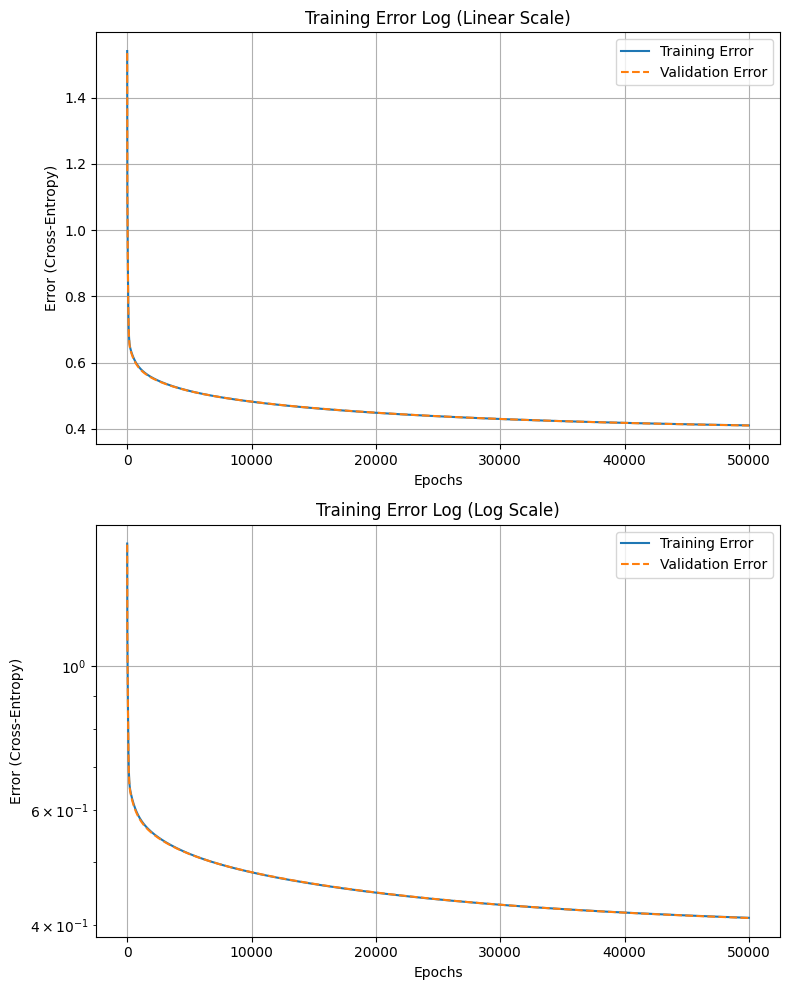

In [40]:
# Plotting Training Loss (Tanpa Normalisasi)

def plot_error(error_log, val_error_log):
    #plot the error
    plt.figure(figsize=(10, 6))
    fig, axs = plt.subplots(2, 1, figsize=(8, 10))

    # Linear scale plot
    axs[0].plot(error_log, label='Training Error')
    axs[0].plot(val_error_log, label='Validation Error', linestyle='dashed')
    axs[0].set_title('Training Error Log (Linear Scale)')
    axs[0].set_xlabel('Epochs')
    axs[0].set_ylabel('Error (Cross-Entropy)')
    axs[0].legend()
    axs[0].grid(True)

    # Log scale plot
    axs[1].semilogy(error_log, label='Training Error')
    axs[1].semilogy(val_error_log, label='Validation Error', linestyle='dashed')
    axs[1].set_title('Training Error Log (Log Scale)')
    axs[1].set_xlabel('Epochs')
    axs[1].set_ylabel('Error (Cross-Entropy)')
    axs[1].legend()
    axs[1].grid(True)

    plt.tight_layout()
    plt.show()

plot_error(error_train, error_val)

In [41]:
# Train dengan data ternormalisasi 

GridStabilityNorm = LogRegBinaryClassification()
error_train_norm, error_val_norm = GridStabilityNorm.train(i_train_norm, o_train_norm, i_val_norm, o_val_norm, epochs=30000, learning_rate=0.1, generate_new_weights=True, patience=25)

Epoch 0, Training Loss: 7.244e-01, Validation Loss: 7.272e-01, Patience: 0/25
Epoch 1, Training Loss: 7.123e-01, Validation Loss: 7.149e-01, Patience: 0/25
Epoch 2, Training Loss: 7.006e-01, Validation Loss: 7.030e-01, Patience: 0/25
Epoch 3, Training Loss: 6.894e-01, Validation Loss: 6.917e-01, Patience: 0/25
Epoch 4, Training Loss: 6.787e-01, Validation Loss: 6.808e-01, Patience: 0/25
Epoch 5, Training Loss: 6.684e-01, Validation Loss: 6.704e-01, Patience: 0/25
Epoch 6, Training Loss: 6.586e-01, Validation Loss: 6.604e-01, Patience: 0/25
Epoch 7, Training Loss: 6.492e-01, Validation Loss: 6.508e-01, Patience: 0/25
Epoch 8, Training Loss: 6.401e-01, Validation Loss: 6.417e-01, Patience: 0/25
Epoch 9, Training Loss: 6.315e-01, Validation Loss: 6.329e-01, Patience: 0/25
Epoch 10, Training Loss: 6.232e-01, Validation Loss: 6.245e-01, Patience: 0/25
Epoch 11, Training Loss: 6.153e-01, Validation Loss: 6.165e-01, Patience: 0/25
Epoch 12, Training Loss: 6.077e-01, Validation Loss: 6.088e-01

<Figure size 1000x600 with 0 Axes>

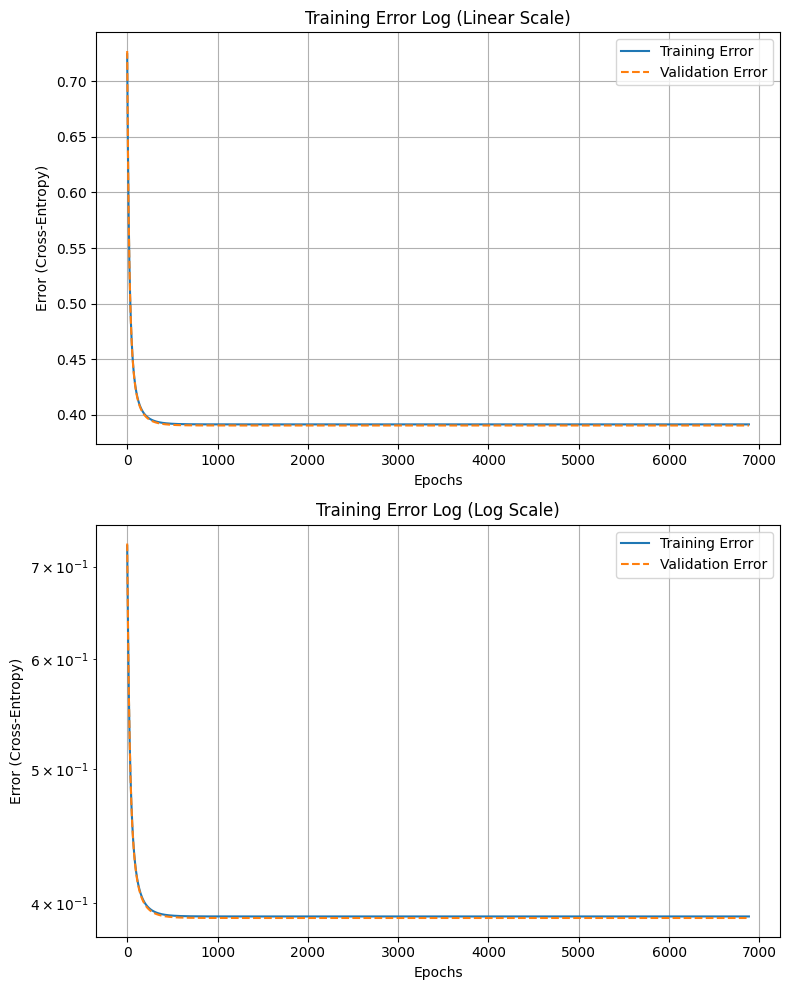

In [42]:
# Plotting Training Loss (Dengan Normalisasi)

plot_error(error_train_norm, error_val_norm)

<div style="text-align: justify; max-width: 90%; margin-left: 0px; margin-right: auto;">

##### **`Testing dan Metriks Evaluasi untuk Performa Model`**

- Prediksi dengan data testing untuk mendapatkan output prediksi dari data testing
- Membuat Confusion Matrix serta menghitung _loss_ dengan memasukkan output prediksi dan output asli ke dalam _loss function (Binary Cross-Entropy)_
- Melakukan Metriks Evaluasi untuk menilai performa model:

    - _Confusion Matrix_ :  
    
      _Confusion Matrix_ adalah tabel yang digunakan untuk mengevaluasi kinerja model klasifikasi biner. Matriks ini terdiri dari empat komponen, yaitu :
      
      - True Positive (TP) :  
        Prediksi positif yang benar, yaitu ketika model memprediksi positif (1) dan nilai aktual juga positif (1).  
      
      - True Negative (TN) :  
        Prediksi negatif yang benar, yaitu ketika model memprediksi negatif (0) dan nilai aktual juga negatif (0).

      - False Positive (FP) :  
        Prediksi positif yang salah, yaitu ketika model memprediksi positif (1) namun nilai aktual negatif (0).

      - False Negative (FN) :  
        Prediksi negatif yang salah, yaitu ketika model memprediksi negatif (0) namun nilai aktual positif (1). 

      - Positive Case (P) :  
        Jumlah kasus di mana nilai aktual positif (1), di mana $P = TP + FN$.

      - Negative Case (N) :  
        Jumlah kasus di mana nilai aktual negatif (0), di mana $N = TN + FP$. 

      _Confusion Matrix_ dapat divisualisasikan dalam bentuk berikut:

      $$
      \begin{bmatrix}
      TP & FN \\
      FP & TN \\
      \end{bmatrix}
      $$

    - Accuracy :  

      Mengukur proporsi prediksi yang benar terhadap seluruh prediksi yang dilakukan oleh model. Akurasi dihitung dengan rumus :
      
      $$
      \text{Accuracy} = \frac{TP + TN}{P + N}
      $$

    - Precision :  

      Precision mengukur keakuratan model dalam memprediksi kelas positif dari keseluruhan prediksi positif yang dibuat oleh model. Precision dihitung dengan rumus :
      
      $$
      \text{Precision} = \frac{TP}{TP + FP}
      $$

    - Recall :  

      Recall mengukur seberapa baik model dalam menemukan semua contoh positif yang sebenarnya dalam dataset. Rumus recall adalah :
      
      $$
      \text{Recall} = \frac{TP}{P}
      $$

    - True Negative Rate :  

      True Negative Rate atau Specificity mengukur kemampuan model dalam mengenali semua contoh negatif yang sebenarnya. Dihitung dengan rumus :
      
      $$
      \text{True Negative Rate} = \frac{TN}{N}
      $$

    - Error Rate :  

      Error Rate mengukur proporsi kesalahan prediksi terhadap keseluruhan prediksi yang dibuat. Rumus untuk Error Rate yaitu: 
      
      $$
      \text{Error Rate} = \frac{FP + FN}{P + N}
      $$

    - F1 Score :  

      F1 Score adalah rata-rata harmonik dari Precision dan Recall. Metriks ini memberikan gambaran keseimbangan antara Precision dan Recall, terutama berguna ketika terdapat ketidakseimbangan kelas. Rumus F1 Score yaitu :
      
      $$
      \text{F1 Score} = 2 \cdot \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}
      $$

</div>


In [43]:
# Fungsi untuk Metriks Evaluasi

class MetriksEvaluasi:
    def __init__(self):
        pass

    def confusion_matrix(self, y_true, y_pred):
        # Inisialisasi nilai TP, TN, FP, FN
        self.TP = np.sum((y_true == 1) & (y_pred == 1))
        self.TN = np.sum((y_true == 0) & (y_pred == 0))
        self.FP = np.sum((y_true == 0) & (y_pred == 1))
        self.FN = np.sum((y_true == 1) & (y_pred == 0))

        # Buat confusion matrix secara manual
        cm = np.array([[self.TP, self.FN], [self.FP, self.TN]])

        # Plot confusion matrix
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm', cbar=True,
                    xticklabels=['Predicted 1 (Stable)', 'Predicted 0 (Unstable)'],
                    yticklabels=['Actual 1 (Stable)', 'Actual 0 (Unstable)'],
                    linewidths=.5, linecolor='black')
        plt.xlabel("Predicted Output")
        plt.ylabel("Actual Output")
        plt.title("Confusion Matrix")
        plt.show()
    
    def performa_model(self):
        # Calculate accuracy, precision, recall, and F1-score
        self.accuracy = (self.TP + self.TN) / (self.TP + self.TN + self.FP + self.FN)
        self.precision = self.TP / (self.TP + self.FP)
        self.recall = self.TP / (self.TP + self.FN)
        self.true_negative_rate = self.TN / (self.TN + self.FP)
        self.error_rate = (self.FP + self.FN) / (self.TP + self.TN + self.FP + self.FN)
        self.f1_score = 2 * ((self.precision * self.recall) / (self.precision + self.recall))

        print("\n" + "="*40)
        print(f"{'Evaluasi Performa Model':^40}")
        print("="*40)
        
        print(f"Accuracy:               {self.accuracy:.3f}")
        print(f"Precision:              {self.precision:.3f}")
        print(f"Recall:                 {self.recall:.3f}")
        print("-" * 40)
        print(f"True Negative Rate:     {self.true_negative_rate:.3f}")
        print(f"Error Rate:             {self.error_rate:.3f}")
        print(f"F1-Score:               {self.f1_score:.3f}")
        print("="*40 + "\n")

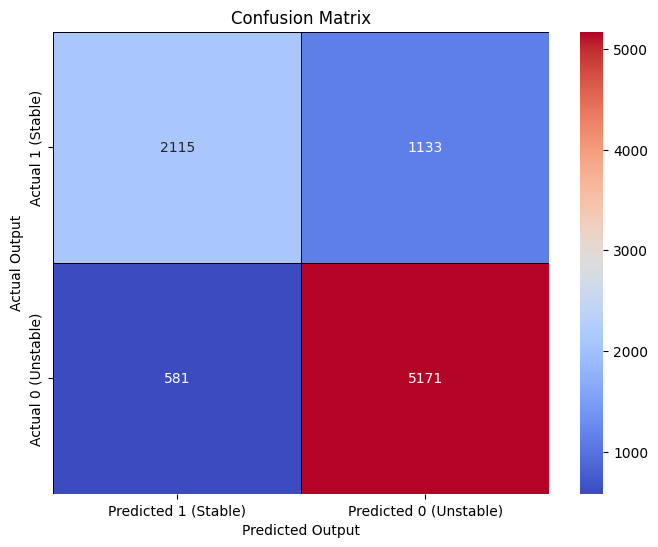


        Evaluasi Performa Model         
Accuracy:               0.810
Precision:              0.784
Recall:                 0.651
----------------------------------------
True Negative Rate:     0.899
Error Rate:             0.190
F1-Score:               0.712

Cross-Entropy: 4.103e-01


In [44]:
# Testing Tanpa Normalisasi

y_pred = GridStability.predict_binary(i_test)
y_pred1 = GridStability.predict_probability(i_test) 
crossentropy = GridStability.binary_cross_entropy_eval(o_test, y_pred1)

ModelEval = MetriksEvaluasi()
ModelEval.confusion_matrix(o_test, y_pred)
ModelEval.performa_model()
print(f'Cross-Entropy: {crossentropy:.3e}')

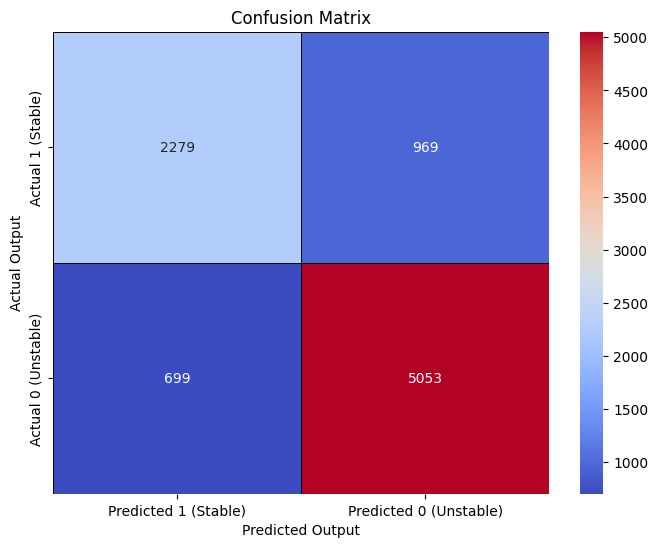


        Evaluasi Performa Model         
Accuracy:               0.815
Precision:              0.765
Recall:                 0.702
----------------------------------------
True Negative Rate:     0.878
Error Rate:             0.185
F1-Score:               0.732

Cross-Entropy: 3.912e-01


In [45]:
# Testing Dengan Normalisasi

y_pred_norm = GridStabilityNorm.predict_binary(i_test_norm) 
y_pred_norm1 = GridStabilityNorm.predict_probability(i_test_norm) 
crossentropy_norm = GridStabilityNorm.binary_cross_entropy_eval(o_test_norm, y_pred_norm1)

ModelEval_Norm = MetriksEvaluasi()
ModelEval_Norm.confusion_matrix(o_test_norm, y_pred_norm)
ModelEval_Norm.performa_model()
print(f'Cross-Entropy: {crossentropy_norm:.3e}')

<div style="text-align: justify; max-width: 90%; margin-left: 0px; margin-right: auto;">

### **_Decision Tree_ untuk Klasifikasi Stabilitas _Electrical Grid_** :

#### **Pendahuluan Program (_Decision Tree_)** : 
Decision tree merupakan struktur pohon yang terdiri dari node-node yang merepresentasikan keputusan dan cabang-cabang yang merepresentasikan konsekuensi dari keputusan tersebut. Setiap node dalam decision tree merepresentasikan variabel dalam dataset yang mempengaruhi keputusan dan konsekuensi tersebut. Pada metode ini, data secara berulang kali dibagi berdasarkan fitur yang menghasilkan nilai **information gain** tertinggi  hingga kondisi berhenti tertentu tercapai, seperti kedalaman maksimum atau jumlah sampel minimum dalam node.

Dalam konteks ini, decision tree akan digunakan untuk menyelesaikan problem klasifikasi dengan memprediksi stabilitas grid listrik berdasarkan beberapa fitur terkait grid, seperti `tau1`, `tau2`, `tau3`, `tau4`, `p2`, `p3`, `p4`, `g1`, `g2`, `g3`, dan `g4`.

#### **Pemodelan Matematika** : 
##### **_Disclaimer_** 
Pada _Decision Tree_ **tidak ada pemodelan secara matematis yang menggambarkan model yang bisa kita subtitusikan nilai input ke dalamnya dan hitung secara matematika untuk mendapatkan output hasil prediksi (seperti regresi atau klasifikasi dengan _logistic regression_)**, melainkan kita dapat melakukan prosesnya dengan secara visual atau mungkin secara perhitungan yang mengedepankan nalar, karena di sini kita membuat _Decision Tree_ seolah-olah dia merupakan sebuah pohon dengan banyak cabang yang dimulai dari _root node_ hingga node-node selanjutnya, atau mungkin bisa dipanggil sebagai _tree stump_ juga. Nah, _stump_ ini asalnya dari fitur-fitur yang kita punya. Jadi singkatnya, untuk melakukan prediksi dengan sebuah model _decision tree_, kita harus menjelajahi _tree_-nya tersebut dan menentukan node mana yang akan kita ambil setelah melalui suatu node berdasarkan nilai _threshold_ tertentu.

Meskipun begitu, ada beberapa hal yang perlu dihitung secara matematis dalam membuat model _decision tree_, yaitu persamaan yang menghitung nilai **_impurity_** atau ketidakmurnian output dari dataset-nya dan juga **_information gain_** yang menentukan seberapa berpengaruh sebuah fitur dalam menentukan nilai target atau nilai hasil di dataset-nya. _Impurity_ sendiri menunjukkan kalau semakin tinggi nilai _impurity_-nya maka dataset-nya sendiri masih banyak bercampur-aduk dari pengaruh fitur-fitur yang ada, nah kita ingin meminimalisir _impurity_ ini, tapi gak melalui proses optimasi secara umum, namun kita buat urutan-urutan node agar semakin ke node paling akhir _impurity_-nya akan berkurang menjadi semakin kecil. 

Nah bagaimana proses menghitung _impurity_ dan _information gain_? Berikut mungkin kami akan jelaskan terkait definisi dan bagaimana proses menghitungnya.


##### **Definisi _Impurity_ dan Informasi Gain** 

##### **_Impurity_**
Dalam _decision tree_, **_impurity_** adalah ukuran seberapa "_mixed_" atau "_impure_" suatu kumpulan data dalam kaitannya dengan kelas targetnya (di sini kelas target-nya itu adalah kestabilan dari sistem grid-nya). Semakin tinggi nilai _impurity_, maka semakin banyak campuran pengaruh kelas lain (kelas lain di sini yaitu fitur-fiturnya) yang ada dalam data tersebut, yang berarti semakin sulit untuk memisahkan data berdasarkan kelas-kelas tersebut.

Ada dua cara utama untuk mengukur _impurity_, yaitu dengan **Entropy** dan **Gini Impurity**.

  1.  Entropy
    - Entropy mengukur tingkat ketidakpastian atau ketidakteraturan dalam dataset. Semakin tinggi entropy, semakin tinggi ketidakpastian tentang kelas dari data tersebut.
    - Nilai entropy berkisar antara 0 hingga 1 untuk masalah klasifikasi biner:
      - **Entropy = 0**: Artinya kumpulan data tersebut "_pure_" atau "murni" atau hanya berisi satu kelas (impurity rendah).
      - **Entropy = 1**: Artinya kumpulan data tersebut maksimal tercampur antara dua kelas, sehingga tidak ada kepastian tentang kelas mana yang lebih dominan.

      Persamaan untuk Entropy yaitu :

      $$
      \text{Entropy} = -\sum_{i=1}^n p_i \log_2(p_i)
      $$
      
      $p_i$ = proporsi data yang masuk ke kelas $i$.

      Karena problem klasifikasi yang kami selesaikan adalah problem klasifikasi biner, maka persamaannya dapat disederhanakan jadi : 

      $$
      \text{Entropy} = - \left( p \log_2(p) + (1 - p) \log_2(1 - p) \right)
      $$

      Dengan :
      $p$ = proporsi atau probabilitas terhadap seluruh sample di mana hasil prediksinya bernilai "1" atau "yes" atau stabil (atau boleh juga sebagai "0", karena kan cuma 2 kelas)

  2.  Gini Impurity
    - Gini impurity mengukur kemungkinan bahwa suatu data yang dipilih secara acak akan diklasifikasikan secara salah jika diberikan label sesuai distribusi kelas pada node tersebut.
    - Nilai Gini impurity berkisar antara 0 hingga 0,5 dalam klasifikasi biner:
      - **Gini = 0**: Menunjukkan bahwa node tersebut murni atau hanya berisi satu kelas.
      - **Gini = 0,5**: Menunjukkan bahwa data tersebut memiliki campuran 50-50 dari dua kelas, yang merupakan tingkat impurity tertinggi dalam klasifikasi biner.

      Persamaan untuk Gini Impurity yaitu :
      $$
      \text{Gini} = 1 - \sum_{i=1}^n p_i^2
      $$

      Atau bisa juga pakai persamaan 
      
      $$
      G(y) = 1 - \sum_{k=1}^{K} \left( \frac{n_k}{N} \right)^2
      $$

      di mana: 
      - $n_k$ adalah jumlah contoh di kelas $k$ 
      - $N$ adalah jumlah total contoh

      Karena problem klasifikasi yang kami selesaikan adalah problem klasifikasi biner, maka persamaannya dapat disederhanakan jadi : 

      $$
      \text{Gini} = 1 - \left( p^2 + (1 - p)^2 \right)
      $$

      atau dapat juga ditulis sebagai:

      $$
      \text{Gini} = 2p(1 - p)
      $$

      di mana:
      - $p$ adalah proporsi data yang termasuk dalam kelas pertama,
      - $1 - p$ adalah proporsi data yang termasuk dalam kelas kedua.

##### ***Information Gain*** 

**_Information Gain_** adalah metrik yang digunakan dalam decision tree untuk menentukan efektivitas suatu fitur dalam memisahkan data ke dalam kelas yang berbeda. Information gain mengukur pengurangan impurity (ketidakmurnian) setelah data dipecah berdasarkan suatu fitur. Semakin besar information gain, semakin baik fitur tersebut dalam memisahkan data sesuai kelasnya

Information gain dihitung dengan mengurangkan impurity dari node parent (sebelum split) dengan rata-rata impurity dari node anak-anak (setelah split). Jadi, information gain menunjukkan seberapa besar "ketidakmurnian" berkurang setelah dilakukan split.

Persamaan untuk menghitung ***Information Gain*** : 

$$
IG = G(y) - \left( \frac{|y_{\text{left}}|}{|y|} G(y_{\text{left}}) + \frac{|y_{\text{right}}|}{|y|} G(y_{\text{right}}) \right)
$$

  <br/>

di mana $y_{\text{left}}$ dan $y_{\text{right}}$ adalah subset dari data setelah split.

#### **_Loss Function_?** 
Pada _decision tree_ konsep _loss function_-nya agak berbeda dan bahkan jujur saya gak tau bisa disebut loss function atau gak, jadi mungkin kalau beda pemahaman akan ada sedikit kesalahpahaman. Di _decision tree_ ada suatu parameter yang memang ingin diminimalkan, tapi tidak dengan melalui proses optimisasi seperti regresi atau klasifikasi dengan _logistic regression_, parameter yang diminimalkan yaitu _impurity_. Nah _impurity_ sendiri menggambarkan seberapa banyak pengaruh data lain terhadap hasil target-nya, jadi di sini tujuan kita itu adalah melakukan _split_ atau pemisahan fitur-fitur atau kelas pada dataset agar nilai _impurity_nya semakin menurun. Jadi konteks _loss function_ di sini adalah berapa _impurity_ setelah semua proses _split_ node dilakukan.

Pada Decision Tree, terdapat persamaan digunakan untuk meminimalkan impuritas total setelah split:
$$
\text{Current Impurity} = \frac{|y_{\text{left}}|}{|y|} \cdot G(y_{\text{left}}) + \frac{|y_{\text{right}}|}{|y|} \cdot G(y_{\text{right}})
$$
dengan:
- $( G(y_{\text{left}}) )$ dan $( G(y_{\text{right}}) )$: impuritas pada node *left* dan *right*.
- $( |y_{\text{left}}| )$ dan $( |y_{\text{right}}| )$: jumlah sampel pada masing-masing node setelah split.


#### **Pemilihan Split Terbaik**
Setiap fitur \( X \) dan threshold \( t \) dievaluasi untuk mencari split terbaik berdasarkan Information Gain:
$$
\text{split} = \max_{f, t} \; IG(X, f, t)
$$
dengan $( f )$ sebagai fitur dan $( t )$ sebagai threshold yang menghasilkan Information Gain tertinggi.

#### **Struktur dan Proses Pembentukan Decision Tree**
**Decision Tree** dibentuk secara rekursif dengan prosedur berikut:
1. Pilih fitur dan threshold terbaik untuk melakukan split.
2. Buat node berdasarkan fitur dan threshold tersebut.
3. Pisahkan data menjadi dua subset: *left* dan *right*.
4. Ulangi proses untuk setiap subset hingga mencapai kondisi berhenti, seperti maksimal kedalaman atau sampel minimum pada node.

Jika kondisi berhenti tercapai atau semua sampel dalam subset memiliki label yang sama, maka sebuah *leaf node* akan dibuat. Nilai leaf node adalah label mayoritas dari data subset tersebut.

#### **Algoritma Pembentukan Decision Tree**
1. Inisialisasi kedalaman maksimum (`max_depth`) dan jumlah sampel minimum untuk split (`min_samples_split`).
2. Pada setiap node, hitung split terbaik dengan nilai **Information Gain** tertinggi.
3. Lakukan split pada data hingga kedalaman maksimum tercapai atau jumlah sampel lebih kecil dari batas minimum.
4. Setelah tree terbentuk, setiap node leaf akan mewakili prediksi untuk subset data yang diwakilinya.

Akurasi model dihitung sebagai berikut:
$$
\text{Accuracy} = \frac{1}{N} \sum_{i=1}^{N} I(y_i = \hat{y}_i)
$$
di mana 
- $( N )$ adalah jumlah sampel pada data uji 
- $( y_i )$ adalah label aktual
- $( \hat{y}_i )$ adalah prediksi

#### **Optimasi Model Decision Tree**

Optimasi pada Decision Tree bertujuan untuk menghindari overfitting serta meningkatkan akurasi dan performa model. Berikut adalah beberapa teknik optimasi yang dapat diterapkan:

##### **1. Pruning**
Pruning adalah teknik untuk mengurangi ukuran tree dengan memangkas node yang tidak signifikan, sehingga kompleksitas model berkurang:
- **Pre-pruning** (atau Early Stopping): Menghentikan pembentukan tree ketika kriteria tertentu terpenuhi, seperti maksimal kedalaman (`max_depth`) atau jumlah sampel minimum untuk split (`min_samples_split`).
- **Post-pruning**: Membentuk tree hingga maksimal dan kemudian memangkas node yang tidak berkontribusi signifikan terhadap performa model, menggunakan validasi silang atau *cost-complexity pruning*.

##### **2. Hyperparameter Tuning**
Hyperparameter tuning membantu menemukan konfigurasi terbaik untuk decision tree, menggunakan *grid search* atau *random search*. Hyperparameter yang dapat dituning meliputi:
- **max_depth**: Batas maksimal kedalaman tree.
- **min_samples_split**: Jumlah minimum sampel yang diperlukan untuk membagi node.
- **min_samples_leaf**: Jumlah minimum sampel pada setiap leaf.
- **max_features**: Jumlah fitur maksimum yang digunakan untuk mencari split terbaik.

##### **3. Menggunakan Ensemble Methods**
Beberapa decision tree dapat digabungkan menggunakan metode ensemble, seperti:
- **Random Forest**: Menggunakan beberapa decision tree yang dilatih pada subset acak dari data, untuk meningkatkan generalisasi.
- **Gradient Boosting**: Menggunakan pohon berturut-turut di mana setiap tree baru berfokus pada kesalahan tree sebelumnya.
  
##### **4. Feature Selection**
Pemilihan fitur yang relevan dapat meningkatkan performa model. Ini dapat dilakukan dengan metode statistik atau algoritma khusus seperti *Recursive Feature Elimination* (RFE).

##### **5. Pengaturan Impuritas dan Split**

Pengaturan kriteria impuritas dan pemilihan split:
- **Criterion**: Gunakan `gini` atau `entropy` untuk impuritas node.
- **Splitter**: Atur `splitter` menjadi `best` atau `random` untuk split terbaik sesuai dengan data.

#### **Validasi Model**

Gunakan **K-Fold Cross Validation** untuk mengevaluasi performa model secara keseluruhan. Rumus untuk **K-Fold Cross Validation** dengan K pembagian adalah:
$$
\text{CV}_{\text{score}} = \frac{1}{K} \sum_{k=1}^{K} \text{score}_k
$$
di mana $( \text{score}_k )$ adalah akurasi pada fold ke-$( k )$.

Teknik-teknik di atas dapat membantu meningkatkan generalisasi dan akurasi model Decision Tree pada data yang belum pernah dilihat.
</div>



### **Program (_Decision Tree_)** :
#### **Import Library**

| Library                       | Fungsi                                                                                                                                                            |
|-------------------------------|-------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| pandas (pd)          | Digunakan untuk memuat dan memproses data dalam bentuk DataFrame, termasuk memisahkan fitur dan target.                                                          |
| numpy (np)           | Digunakan untuk perhitungan numerik, seperti operasi array dan fungsi-fungsi statistik pada data.                                                                |
| graphviz | Untuk gambar Decision Tree. |
| seaborn (sns) | Untuk confusion matrix |
| sklearn.tree (export_graphviz) | Untuk gambar Decision Tree |
| from sklearn.model_selection (train_test_split) | Untuk split dataset |


#### **Fungsi dan Kelas dalam Program**
Berikut penjelasan fungsi dan kelas utama yang membentuk implementasi Decision Tree dalam kode:

| Fungsi/Kelas             | Penjelasan                                                                                                                              |
|-----------------------------------|---------------------------------------------------------------------------------------------------------------------------------------------------|
| giniimpurity(y)        | Menghitung impuritas Gini untuk mengukur ketidakmurnian node berdasarkan distribusi kelas dalam label $( y )$                                    |
| split\_data(X, y, feature, threshold) | Membagi data menjadi dua subset berdasarkan fitur tertentu dan threshold, menghasilkan node ${left}$ dan ${right}$.            |
| information\_gain(y, y\_left, y\_right) | Menghitung nilai Information Gain, yaitu pengurangan impuritas setelah split berdasarkan node ${left}$ dan ${right}$        |
| TreeNode                 | Kelas yang merepresentasikan node dalam Decision Tree, termasuk atribut ${feature}$, ${threshold}$, ${left}$, ${right}$, dan ${value}$ |
| DecisionTree             | Kelas utama yang membentuk model Decision Tree, terdiri dari metode untuk menentukan split terbaik, membangun tree, dan prediksi.                  |
| fit(X, y)                | Metode dalam ${DecisionTree}$ untuk melatih model dengan membangun tree dari data pelatihan $( X )$ dan label $( y )$.                      |
| predict(X)               | Metode untuk memprediksi label pada data baru $( X )$ dengan menelusuri node dalam tree.                                                          |



In [24]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import graphviz
from sklearn.tree import export_graphviz
from sklearn.model_selection import train_test_split

#### **Preprocessing Data**

**Load Dataset dan Pisahkan Data yang Diperlukan dengan yang Tidak Diperlukan**

1. Load dataset menggunakan pustaka `pandas`.
2. Pilih fitur yang diperlukan untuk pelatihan: `tau1`, `tau2`, `tau3`, `tau4`, `p2`, `p3`, `p4`, `g1`, `g2`, `g3`, `g4`.
3. Ubah kolom target `stabf` menjadi nilai biner, dengan `1` untuk "stable" dan `0` untuk "unstable".
4. Bagi data menjadi training dan testing data

In [25]:
# 10000 data
data = pd.read_csv('./dataset_tugas2.csv')

# 60000 data
#data = pd.read_csv('./augmented_dataset_tugas2.csv')

data = data.drop(columns=['stab', 'p1'])
data['stabf'] = data['stabf'].map({'stable': 1, 'unstable': 0}) 

# Pisah untuk normalisasi input-nya
i_data = data.drop(columns=['stabf']).to_numpy()
o_data = data['stabf'].to_numpy()

print("Input data :", i_data)
print("\nOutput data (stabf):", o_data)

Input data : [[2.95906002 3.0798852  8.38102539 ... 0.85957811 0.88744492 0.95803399]
 [9.30409723 4.90252411 3.04754073 ... 0.86241408 0.56213905 0.78175991]
 [8.97170691 8.84842842 3.04647875 ... 0.76668866 0.83944402 0.10985324]
 ...
 [2.36403419 2.84203025 8.77639096 ... 0.98650532 0.14928646 0.14598403]
 [9.63151069 3.9943976  2.75707093 ... 0.58755755 0.88911835 0.81839133]
 [6.53052662 6.7817899  4.34969522 ... 0.50544105 0.37876093 0.94263083]]

Output data (stabf): [0 1 0 ... 1 0 0]


In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(i_data, o_data, test_size=0.3, random_state=42)

#### **Menghitung Gini Impurity dan Entropy**

Kedua fungsi ini digunakan untuk menghitung **impurity** dari suatu array `y` yang berisi label kelas. Impurity adalah ukuran ketidakmurnian atau campuran data berdasarkan distribusi kelas, dan sangat berguna dalam algoritma decision tree untuk menentukan split terbaik.

**`gini_impurity(y)`**

  - Fungsi `gini_impurity` menghitung **Gini impurity** dari array `y`. Gini impurity mengukur kemungkinan bahwa suatu data yang dipilih secara acak akan diklasifikasikan dengan salah jika label diberikan sesuai distribusi kelas di dalam array `y`.
  - Rumus Gini impurity:
    $$
    \text{Gini impurity} = 1 - \sum_{i=1}^n \left(\frac{\text{count}_i}{\text{len}(y)}\right)^2
    $$
    di mana:
    - $\text{count}_i$ adalah jumlah elemen dalam kelas ke-$i$,
    - $\text{len}(y)$ adalah total jumlah elemen dalam array `y`.

  Fungsi `np.unique(y, return_counts=True)` menghitung jumlah kelas unik dalam `y` beserta frekuensi masing-masing kelas.
  Impurity dihitung dengan menjumlahkan kuadrat dari proporsi setiap kelas, kemudian mengurangkannya dari 1.

**`entropy(y)`**

  Fungsi `entropy` menghitung **entropy** dari array `y`. Entropy mengukur ketidakpastian dalam data; nilai entropy yang lebih tinggi menunjukkan ketidakpastian lebih besar atau data yang lebih tercampur.

  Rumus Entropy:

  $$
  \text{Entropy} = -\sum_{i=1}^n \left(\frac{\text{count}_i}{\text{len}(y)}\right) \log_2\left(\frac{\text{count}_i}{\text{len}(y)}\right)
  $$

  di mana:
  - $\text{count}_i$ adalah jumlah elemen dalam kelas ke-$i$,
  - $\text{len}(y)$ adalah total jumlah elemen dalam array `y`.

  Fungsi `np.unique(y, return_counts=True)` menghitung jumlah kelas unik dalam `y` beserta frekuensi masing-masing kelas.
  Entropy dihitung dengan menjumlahkan produk antara proporsi setiap kelas dan logaritma basis 2 dari proporsi tersebut, lalu mengalikannya dengan -1 untuk menghitung ketidakpastian total.




In [27]:
def gini_impurity(y):
    classes, counts = np.unique(y, return_counts=True)
    impurity = 1 - sum((count / len(y)) ** 2 for count in counts)
    return impurity

def entropy(y):
    classes, counts = np.unique(y, return_counts=True)
    entropy_value = -sum((count / len(y)) * np.log2(count / len(y)) for count in counts)
    return entropy_value

#### ***Memisahkan Data Berdasarkan Threshold***
- **Tujuan**: Fungsi ini memisahkan data menjadi dua subset, kiri dan kanan, berdasarkan threshold pada fitur tertentu, yang membantu dalam membentuk cabang-cabang di decision tree.

In [28]:
def split_datas(X, y, feature, threshold):
    left_indices = X[:, feature] <= threshold
    right_indices = X[:, feature] > threshold
    return X[left_indices], X[right_indices], y[left_indices], y[right_indices]

#### **Menghitung Information Gain**

Fungsi ini menghitung seberapa besar impurity berkurang akibat pemisahan berdasarkan persamaan _information gain_ : 

$$
\text{Information Gain} = \text{Impurity}(y) - \left( \frac{\text{len}(y_{\text{left}})}{\text{len}(y)} \cdot \text{Impurity}(y_{\text{left}}) + \frac{\text{len}(y_{\text{right}})}{\text{len}(y)} \cdot \text{Impurity}(y_{\text{right}}) \right)
$$

In [29]:
def information_gain_gini(y, y_left, y_right):
    p_left, p_right = len(y_left) / len(y), len(y_right) / len(y)
    return gini_impurity(y) - (p_left * gini_impurity(y_left) + p_right * gini_impurity(y_right))

def information_gain_entropy(y, y_left, y_right):
    p_left, p_right = len(y_left) / len(y), len(y_right) / len(y)
    return entropy(y) - (p_left * entropy(y_left) + p_right * entropy(y_right))

#### **Membuat Decision Tree**

**Kelas TreeNode**

`TreeNode` berfungsi untuk membangun struktur decision tree, di mana setiap node dalam pohon mewakili satu titik keputusan (split). Kelas ini menyimpan informasi seperti fitur yang dipakai buat split, nilai ambang batasnya, serta rujukan ke cabang kiri dan kanan.

**Cara Kerja**

- Ketika kita inisialisasi sebuah `TreeNode`, kita bisa kasih tahu `feature` dan `threshold` yang dipakai buat melakukan split di node tersebut. `feature` ini adalah fitur spesifik (seperti kolom dalam dataset) yang kita gunakan untuk membagi data, sedangkan `threshold` adalah batasnya. Kalau nilai suatu data di fitur itu kurang atau sama dengan threshold, data bakal masuk ke cabang kiri (`left`), kalau lebih dari threshold, masuk ke cabang kanan (`right`).

- Di dalam node ini juga ada `left` dan `right`, yaitu referensi ke node anak. Jadi, `TreeNode` ini bisa dibilang semacam "simpul" yang nyambung ke simpul-simpul lainnya di pohon. Setiap node tahu ke mana harus mengarahkan data tergantung hasil split-nya.

- Ada juga `value`, yang cuma diisi kalau node ini adalah node daun (leaf node). Ini berarti bahwa kalau kita sudah sampai di node ini dan gak ada lagi split, `value` adalah hasil prediksi akhir (misal, kelas tertentu atau nilai regresi). Kalau node ini adalah node internal (ada split lagi di bawahnya), `value` ini dibiarkan kosong (`None`).

Kelas `TreeNode` ini membangun struktur pohon dengan cara memutuskan cabang kiri dan kanan berdasarkan fitur dan threshold. Kalau sudah sampai di node tanpa split (leaf), kita ambil prediksi akhir dari `value`. Node-node ini kemudian dirangkai jadi pohon yang lengkap untuk decision tree.

In [30]:
class TreeNode:
    def __init__(self, feature=None, threshold=None, left=None, right=None, *, value=None):
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value

##### **Kelas DecisionTree**

Kedua kelas ini mengimplementasikan decision tree untuk klasifikasi dengan perbedaan pada metrik impurity yang digunakan:
- `DecisionTreeGini` menggunakan **Gini impurity**.
- `DecisionTreeEntropy` menggunakan **entropy**.

#### Proses Utama dalam Kelas

1. **Inisialisasi Model**  
   Menggunakan fungsi `__init__`. Menetapkan parameter maksimum kedalaman pohon (`max_depth`) dan jumlah minimum sampel untuk melakukan split (`min_samples_split`). Juga menyiapkan tempat untuk menyimpan root pohon (`self.root`), yang akan diisi setelah pohon terbentuk.

2. **Mencari Split Terbaik**  
   Menggunakan fungsi `_best_split`. Mengevaluasi setiap fitur dan threshold untuk mencari split yang memberikan **information gain** tertinggi. Split terbaik ini akan digunakan untuk membagi data di node saat ini.
   - Pada `DecisionTreeGini`, menghitung information gain menggunakan fungsi `information_gain_gini`, yang didasarkan pada Gini impurity:
     $$
     \text{Information Gain} = \text{Gini impurity}(y) - \left( \frac{\text{len}(y_{\text{left}})}{\text{len}(y)} \cdot \text{Gini impurity}(y_{\text{left}}) + \frac{\text{len}(y_{\text{right}})}{\text{len}(y)} \cdot \text{Gini impurity}(y_{\text{right}}) \right)
     $$
   - Pada `DecisionTreeEntropy`, menggunakan fungsi `information_gain_entropy`, dengan persamaan yang mirip tetapi berbasis entropy:
     $$
     \text{Information Gain} = \text{Entropy}(y) - \left( \frac{\text{len}(y_{\text{left}})}{\text{len}(y)} \cdot \text{Entropy}(y_{\text{left}}) + \frac{\text{len}(y_{\text{right}})}{\text{len}(y)} \cdot \text{Entropy}(y_{\text{right}}) \right)
     $$

3. **Membangun Decision Tree**  
   Menggunakan fungsi `_build_tree`. Secara rekursif, membentuk decision tree dengan membagi data hingga memenuhi kondisi akhir, seperti kedalaman maksimum atau sampel yang terlalu kecil untuk dibagi. Jika kondisi akhir terpenuhi, node ini akan menjadi **leaf node** dengan nilai prediksi tetap, yang disimpan dalam node sebagai `value`.

4. **Menentukan Label Paling Umum**  
   Menggunakan fungsi `_most_common_label`. Jika node sudah tidak bisa di-split, model akan menentukan label paling umum di dalam node tersebut sebagai prediksi akhir. Fungsi `np.bincount(y).argmax()` digunakan untuk mendapatkan label yang paling sering muncul.

5. **Melatih Model**  
   Menggunakan fungsi `fit`. Memulai proses pembentukan pohon dengan menjalankan rekursi `_build_tree` pada data training yang diberikan (`X` dan `y`), dan mengatur root pohon (`self.root`) setelah pohon terbentuk.

6. **Traversal untuk Prediksi Satu Data**  
   Menggunakan fungsi `_predict`. Melakukan traversal dalam pohon untuk menentukan prediksi bagi satu data point `x`, dengan mengikuti cabang kiri atau kanan berdasarkan threshold hingga mencapai leaf node, di mana nilai prediksi akan dikembalikan sebagai hasil akhir.

7. **Prediksi untuk Banyak Data**  
   Menggunakan fungsi `predict`. Memanfaatkan fungsi `_predict` untuk menghasilkan prediksi bagi seluruh data dalam kumpulan data input `X`. Fungsi ini mengembalikan array yang berisi prediksi untuk setiap data point dalam `X`.

In [31]:
class DecisionTreeGini:
    def __init__(self, max_depth=5, min_samples_split=2):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.root = None

    def _best_split(self, X, y):
        """Find the best feature and threshold to split on."""
        best_gain = -1
        split = {'feature': None, 'threshold': None}
        for feature in range(X.shape[1]):
            thresholds = np.unique(X[:, feature])
            for threshold in thresholds:
                X_left, X_right, y_left, y_right = split_datas(X, y, feature, threshold)
                if len(y_left) > 0 and len(y_right) > 0:
                    gain = information_gain_gini(y, y_left, y_right)
                    if gain > best_gain:
                        best_gain = gain
                        split = {'feature': feature, 'threshold': threshold}
        return split['feature'], split['threshold'], best_gain

    def _build_tree(self, X, y, depth):
        """Recursively build the tree."""
        num_samples, num_features = X.shape
        if depth >= self.max_depth or num_samples < self.min_samples_split or len(np.unique(y)) == 1:
            leaf_value = self._most_common_label(y)
            return TreeNode(value=leaf_value)

        feature, threshold, gain = self._best_split(X, y)
        if gain == -1:
            leaf_value = self._most_common_label(y)
            return TreeNode(value=leaf_value)

        X_left, X_right, y_left, y_right = split_datas(X, y, feature, threshold)
        left_child = self._build_tree(X_left, y_left, depth + 1)
        right_child = self._build_tree(X_right, y_right, depth + 1)
        return TreeNode(feature, threshold, left_child, right_child)

    def _most_common_label(self, y):
        """Find the most common label in y."""
        return np.bincount(y).argmax()

    def fit(self, X, y):
        self.root = self._build_tree(X, y, 0)

    def _predict(self, x, node):
        """Recursively traverse the tree to make a prediction."""
        if node.value is not None:
            return node.value
        if x[node.feature] <= node.threshold:
            return self._predict(x, node.left)
        return self._predict(x, node.right)

    def predict(self, X):
        return np.array([self._predict(x, self.root) for x in X])

class DecisionTreeEntropy:
    def __init__(self, max_depth=5, min_samples_split=2):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.root = None

    def _best_split(self, X, y):
        best_gain = -1
        split = {'feature': None, 'threshold': None}
        for feature in range(X.shape[1]):
            thresholds = np.unique(X[:, feature])
            for threshold in thresholds:
                X_left, X_right, y_left, y_right = split_datas(X, y, feature, threshold)
                if len(y_left) > 0 and len(y_right) > 0:
                    gain = information_gain_entropy(y, y_left, y_right)
                    if gain > best_gain:
                        best_gain = gain
                        split = {'feature': feature, 'threshold': threshold}
        return split['feature'], split['threshold'], best_gain

    def _build_tree(self, X, y, depth):
        num_samples, num_features = X.shape
        if depth >= self.max_depth or num_samples < self.min_samples_split or len(np.unique(y)) == 1:
            leaf_value = self._most_common_label(y)
            return TreeNode(value=leaf_value)

        feature, threshold, gain = self._best_split(X, y)
        if gain == -1:
            leaf_value = self._most_common_label(y)
            return TreeNode(value=leaf_value)

        X_left, X_right, y_left, y_right = split_datas(X, y, feature, threshold)
        left_child = self._build_tree(X_left, y_left, depth + 1)
        right_child = self._build_tree(X_right, y_right, depth + 1)
        return TreeNode(feature, threshold, left_child, right_child)

    def _most_common_label(self, y):
        return np.bincount(y).argmax()

    def fit(self, X, y):
        self.root = self._build_tree(X, y, 0)

    def _predict(self, x, node):
        if node.value is not None:
            return node.value
        if x[node.feature] <= node.threshold:
            return self._predict(x, node.left)
        return self._predict(x, node.right)

    def predict(self, X):
        return np.array([self._predict(x, self.root) for x in X])

#### **Train dan Testing Model**

In [32]:
# Pakai Gini Impurity
tree1 = DecisionTreeGini(max_depth=5, min_samples_split=10)
tree1.fit(X_train, y_train)

y_pred1 = tree1.predict(X_test)

# Pakai Entropy
#tree2 = DecisionTreeEntropy(max_depth=5, min_samples_split=10)
#tree2.fit(X_train, y_train)

#y_pred2 = tree1.predict(X_test)

#### **Metriks Evaluasi dan Visualisasi Decision Tree**


In [33]:
class MetriksEvaluasi:
    def __init__(self):
        pass

    def confusion_matrix(self, y_true, y_pred):
        self.TP = np.sum((y_true == 1) & (y_pred == 1))
        self.TN = np.sum((y_true == 0) & (y_pred == 0))
        self.FP = np.sum((y_true == 0) & (y_pred == 1))
        self.FN = np.sum((y_true == 1) & (y_pred == 0))

        cm = np.array([[self.TP, self.FN], [self.FP, self.TN]])

        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm', cbar=True,
                    xticklabels=['Predicted 1', 'Predicted 0'],
                    yticklabels=['Actual 1', 'Actual 0'],
                    linewidths=.5, linecolor='black')
        plt.xlabel("Predicted Label")
        plt.ylabel("True Label")
        plt.title("Confusion Matrix")
        plt.show()
    
    def performa_model(self):
        self.accuracy = (self.TP + self.TN) / (self.TP + self.TN + self.FP + self.FN)
        self.precision = self.TP / (self.TP + self.FP) if (self.TP + self.FP) > 0 else 0
        self.recall = self.TP / (self.TP + self.FN) if (self.TP + self.FN) > 0 else 0
        self.f1_score = 2 * ((self.precision * self.recall) / (self.precision + self.recall)) if (self.precision + self.recall) > 0 else 0

        print(f'Accuracy: {self.accuracy:.3f}')
        print(f'Precision: {self.precision:.3f}')
        print(f'Recall: {self.recall:.3f}')
        print(f'F1-Score: {self.f1_score:.3f}')


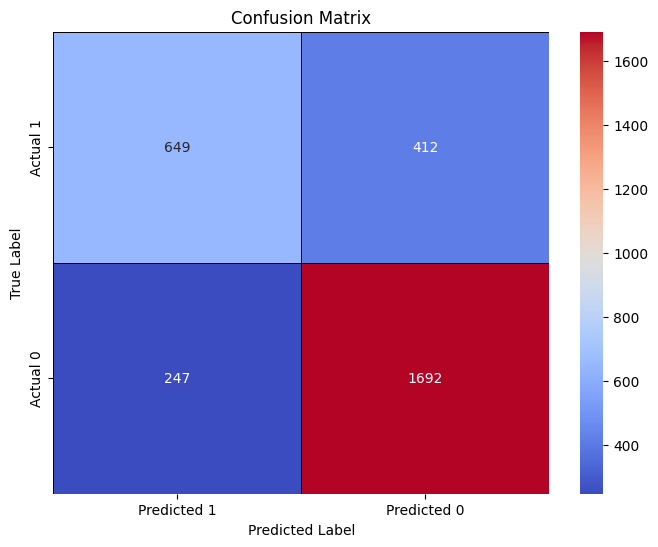

Accuracy: 0.780
Precision: 0.724
Recall: 0.612
F1-Score: 0.663


In [34]:
# Evaluasi Performa Model Decision Tree dengan Gini Impurity

DecisionTree_Gini = MetriksEvaluasi()
DecisionTree_Gini.confusion_matrix(y_test, y_pred1)
DecisionTree_Gini.performa_model()

In [ ]:
# Evaluasi Performa Model Decision Tree dengan Entropy

#DecisionTree_Entropy = MetriksEvaluasi()
#DecisionTree_Entropy.confusion_matrix(y_test, y_pred2)
#DecisionTree_Entropy.performa_model()

In [35]:
# Visualisasi Decision Tree

def visualize_tree(tree):
    dot_data = export_graphviz(tree, out_file=None, 
                               feature_names=['tau1', 'tau2', 'tau3', 'tau4', 'p2', 'p3', 'p4', 'g1', 'g2', 'g3', 'g4'], 
                               class_names=['unstable', 'stable'],
                               filled=True, rounded=True, 
                               special_characters=True)  
    graph = graphviz.Source(dot_data)  
    return graph

In [ ]:
# Visualisasi Decision Tree dengan Gini Impurity

def visualize_custom_tree(node, feature_names, depth=0):
	if node.value is not None:
		return f'{"|   " * depth}class = {node.value}\n'
	
	left_child = visualize_custom_tree(node.left, feature_names, depth + 1)
	right_child = visualize_custom_tree(node.right, feature_names, depth + 1)
	
	return f'{"|   " * depth}{feature_names[node.feature]} <= {node.threshold}\n{left_child}{"|   " * depth}else\n{right_child}'

# Visualize the custom tree structure
feature_names = ['tau1', 'tau2', 'tau3', 'tau4', 'p2', 'p3', 'p4', 'g1', 'g2', 'g3', 'g4']
tree_visualization = visualize_custom_tree(tree1.root, feature_names)
print(tree_visualization)

tau1 <= 2.86532662692313
|   tau4 <= 3.22547629402498
|   |   g2 <= 0.45945608146341
|   |   |   p3 <= -0.508511836653738
|   |   |   |   g1 <= 0.99870941731377
|   |   |   |   |   class = 1
|   |   |   |   else
|   |   |   |   |   class = 0
|   |   |   else
|   |   |   |   class = 0
|   |   else
|   |   |   g3 <= 0.482024823151126
|   |   |   |   tau1 <= 1.99440162191642
|   |   |   |   |   class = 1
|   |   |   |   else
|   |   |   |   |   class = 1
|   |   |   else
|   |   |   |   tau3 <= 2.51614302340067
|   |   |   |   |   class = 1
|   |   |   |   else
|   |   |   |   |   class = 0
|   else
|   |   g4 <= 0.532601570180649
|   |   |   tau3 <= 4.08873302393525
|   |   |   |   g2 <= 0.712944673562115
|   |   |   |   |   class = 1
|   |   |   |   else
|   |   |   |   |   class = 1
|   |   |   else
|   |   |   |   tau2 <= 4.28299121989056
|   |   |   |   |   class = 1
|   |   |   |   else
|   |   |   |   |   class = 0
|   |   else
|   |   |   tau2 <= 1.9902755778169
|   |   |   |   g3

In [ ]:
# Visualisasi Decision Tree dengan Entropy

#visualize_tree(tree2)